In [40]:
import numpy as np
import scienceplots
from matplotlib import pyplot as plt
import matplotlib as mp
import pandas as pd
import os
import scipy as sp
import seaborn as sns
import json
import yaml
import functools
import itertools

In [41]:
prefix='../bench-ipvs/'

In [46]:
names = ['throughput', 'latency']
pidstat_names = ['timestamp', 'wait', 'used', 'core', 'command']

def import_simple(path, additional_names=[]):
    tmp = pd.read_csv(f"{path}/sock.csv", names=additional_names+names)
    tmp['throughput'] /= 1024
    tmp['latency'] /= 1000
    tmp_cpu = pd.read_csv(f"{path}/pidstat.csv", names=additional_names+pidstat_names)
    tmp_cpu = tmp_cpu.groupby(additional_names + ['core', 'timestamp']).sum(numeric_only=True).reset_index() 
    tmp_cpu = tmp_cpu.groupby(additional_names + ['core']).median(numeric_only=True).reset_index()
    # global_cpu = tmp.groupby(['cpu', 'client']).mean().reset_index()
#     print(tmp_cpu)
#     print()
    tmp['cpu'] = tmp_cpu.groupby(additional_names).mean().reset_index()['used']
    tmp['cpu_efficiency'] = tmp['throughput'] / tmp['cpu']
    return tmp

In [109]:
benchmarks = os.listdir(prefix)
list(enumerate(benchmarks))

[(0, 'benchmark-ipvs-70'),
 (1, 'benchmark-ipvs-30'),
 (2, 'benchmark-ipvs-0'),
 (3, 'benchmark-ipvs-120')]

In [110]:
delays = [0, 30, 70, 120]

In [111]:
dfs = {}
for delay in delays:
    ipvs_path = f"{prefix}/benchmark-ipvs-{delay}/summary"
    ipvs = import_simple(ipvs_path, additional_names=['algo'])
    ipvs['variant'] = 'IPVS'
    ipvs['delay'] = delay
    
    dfs[delay] = ipvs

In [112]:
df = pd.concat(dfs.values(), axis=0)

In [117]:
algo_order = ['rr', 'lc', 'nq', 'sh', 'dh']

In [118]:
df_ = df.pivot(index='delay', columns='algo', values=['throughput', 'latency', 'cpu'])

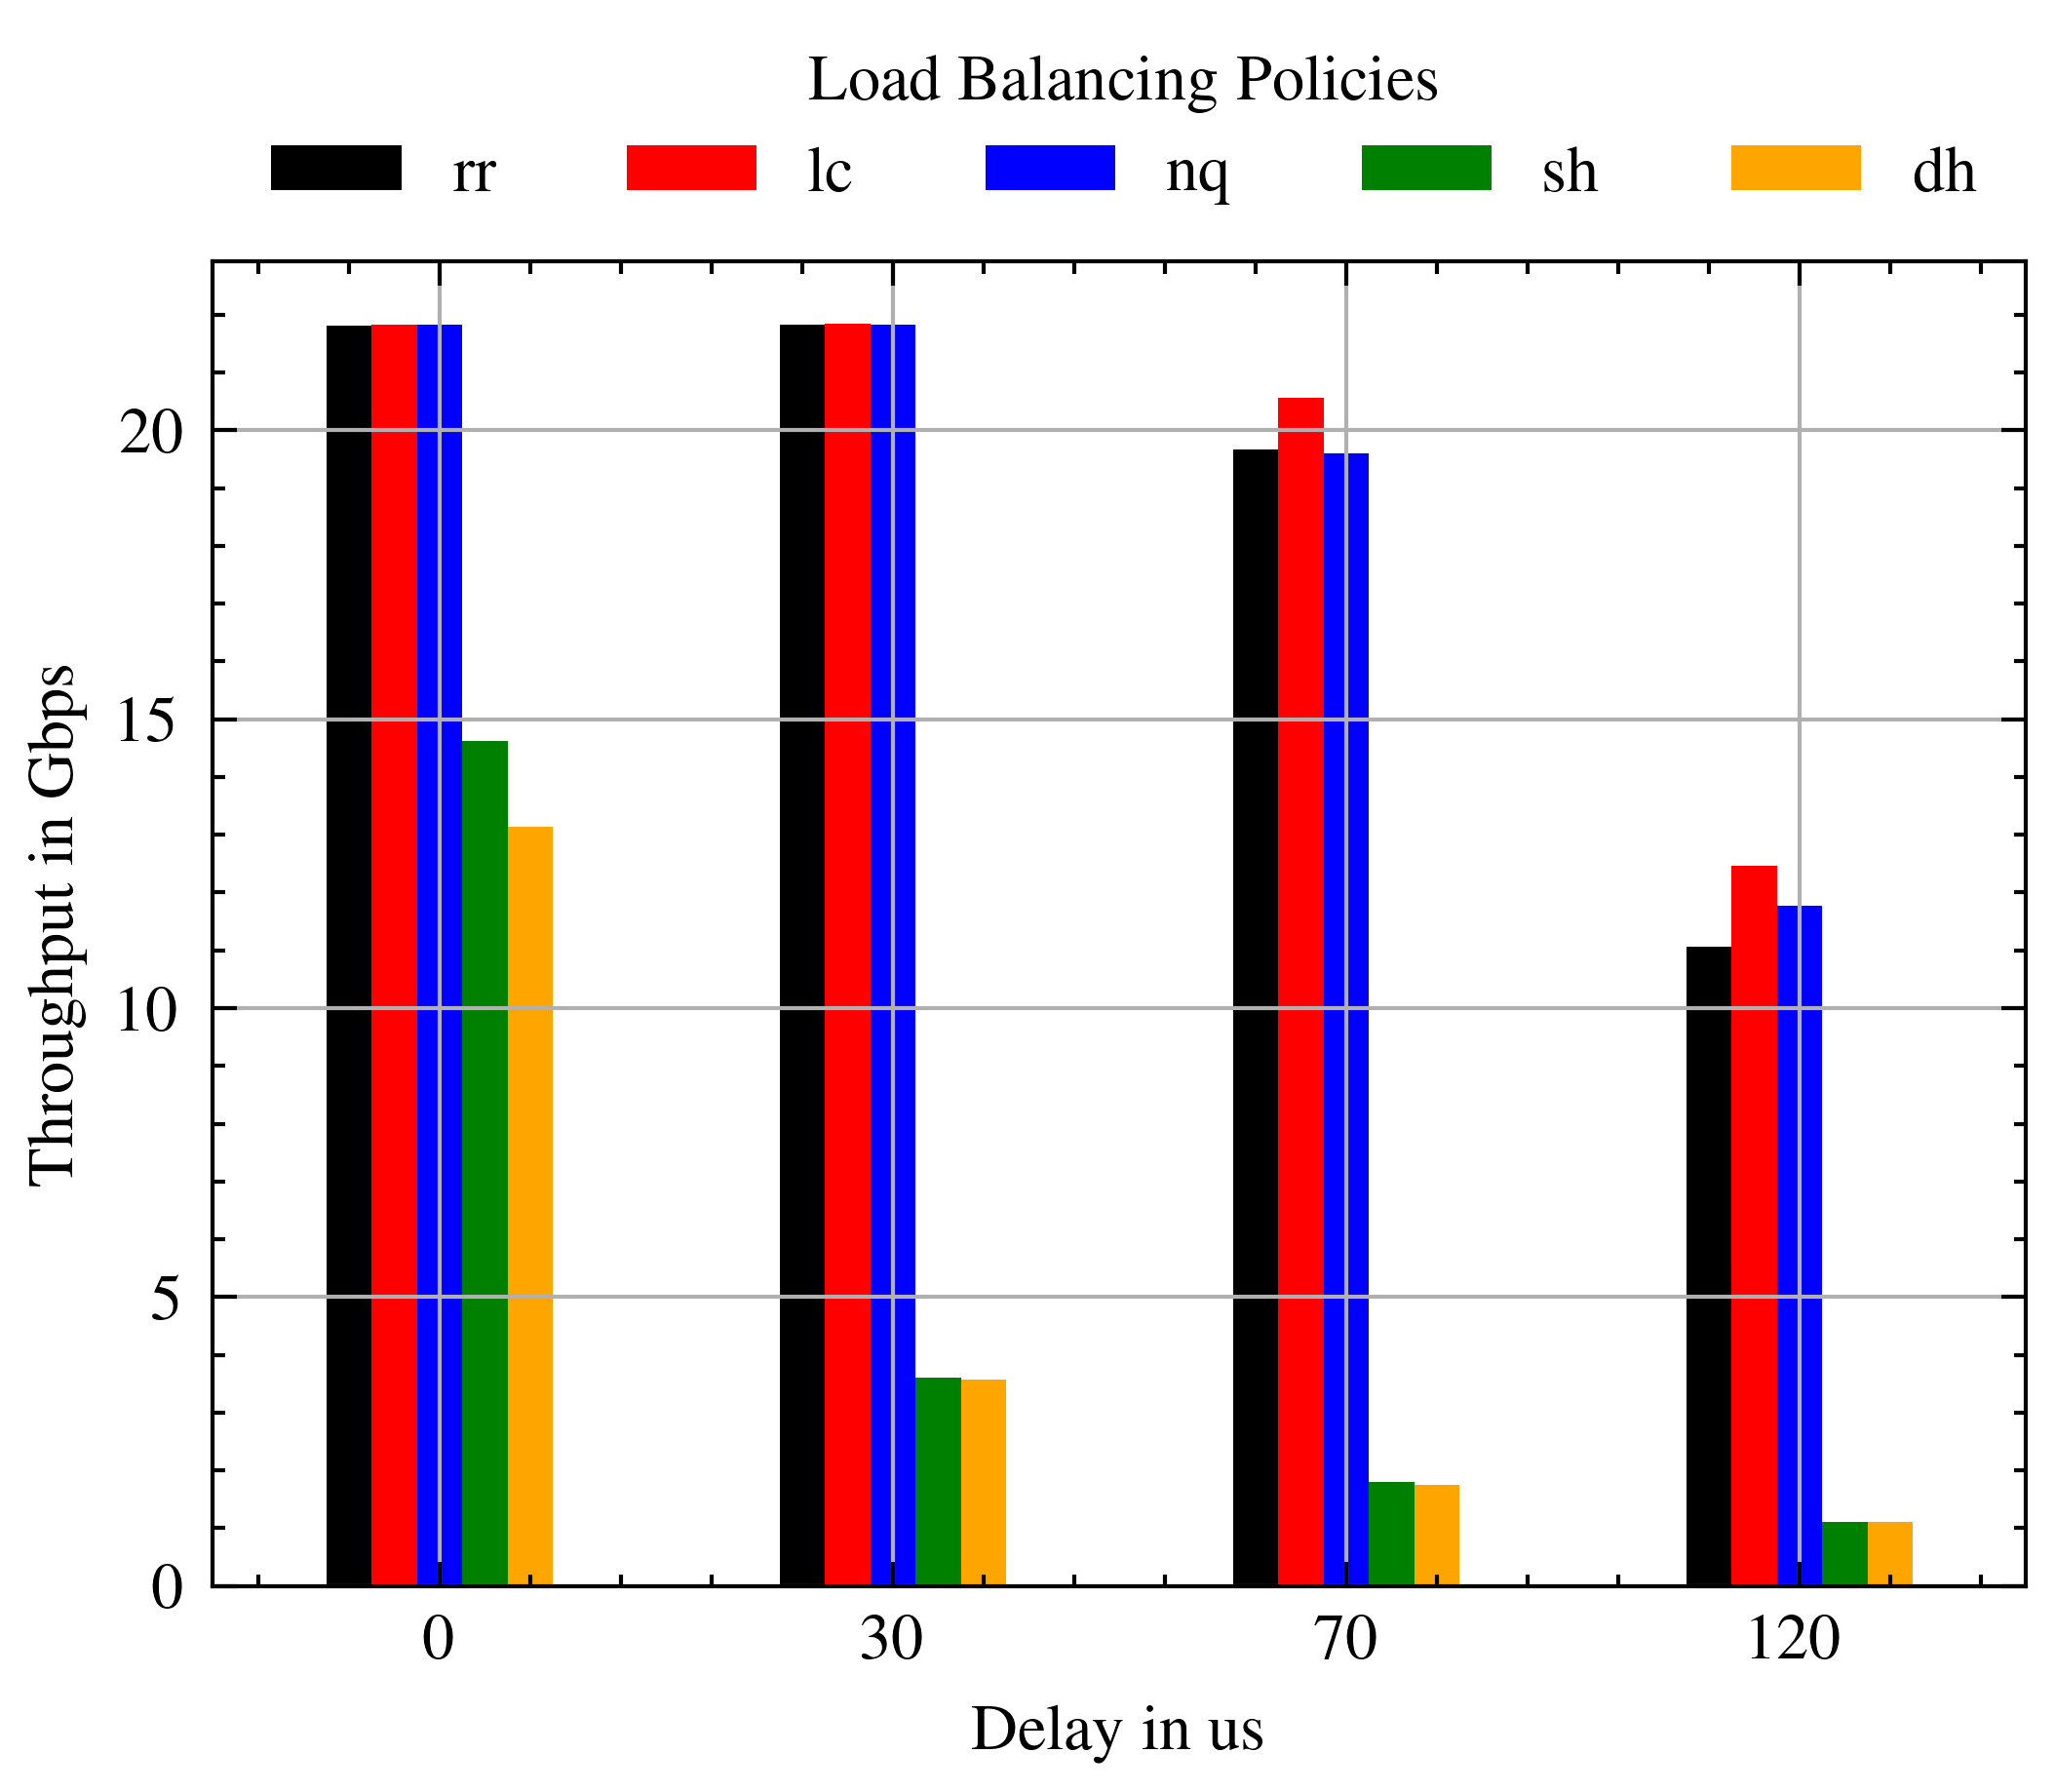

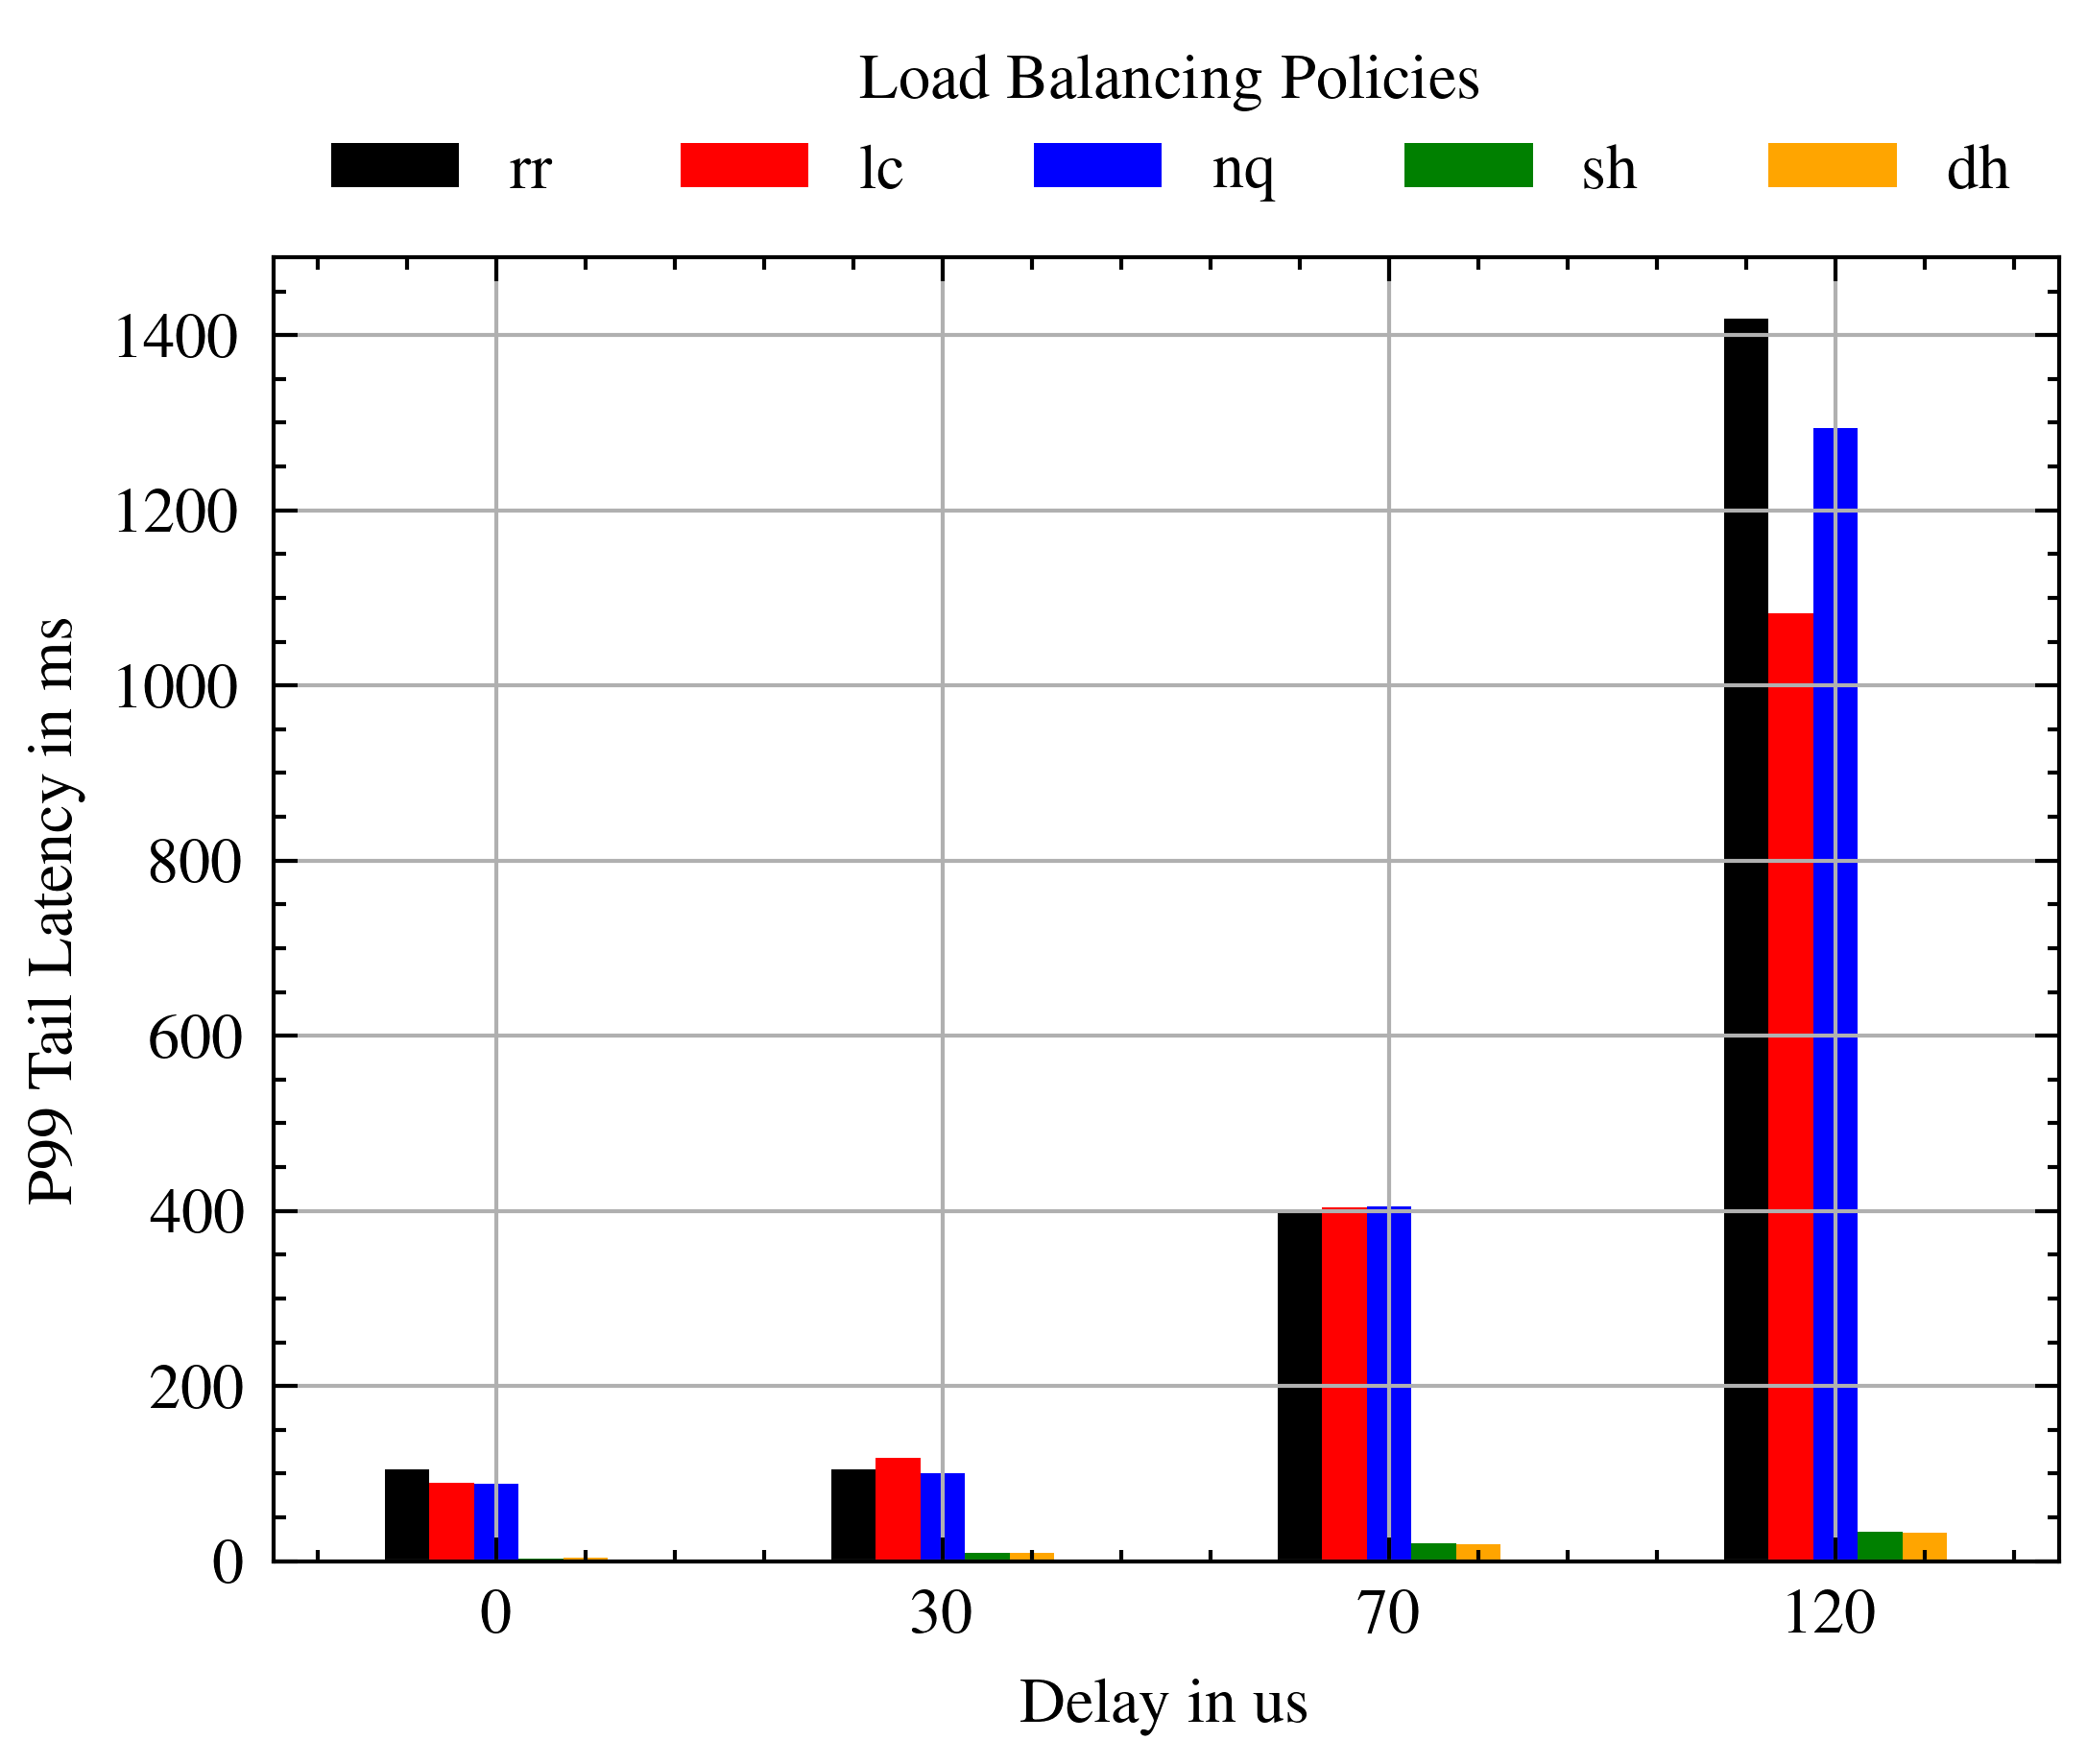

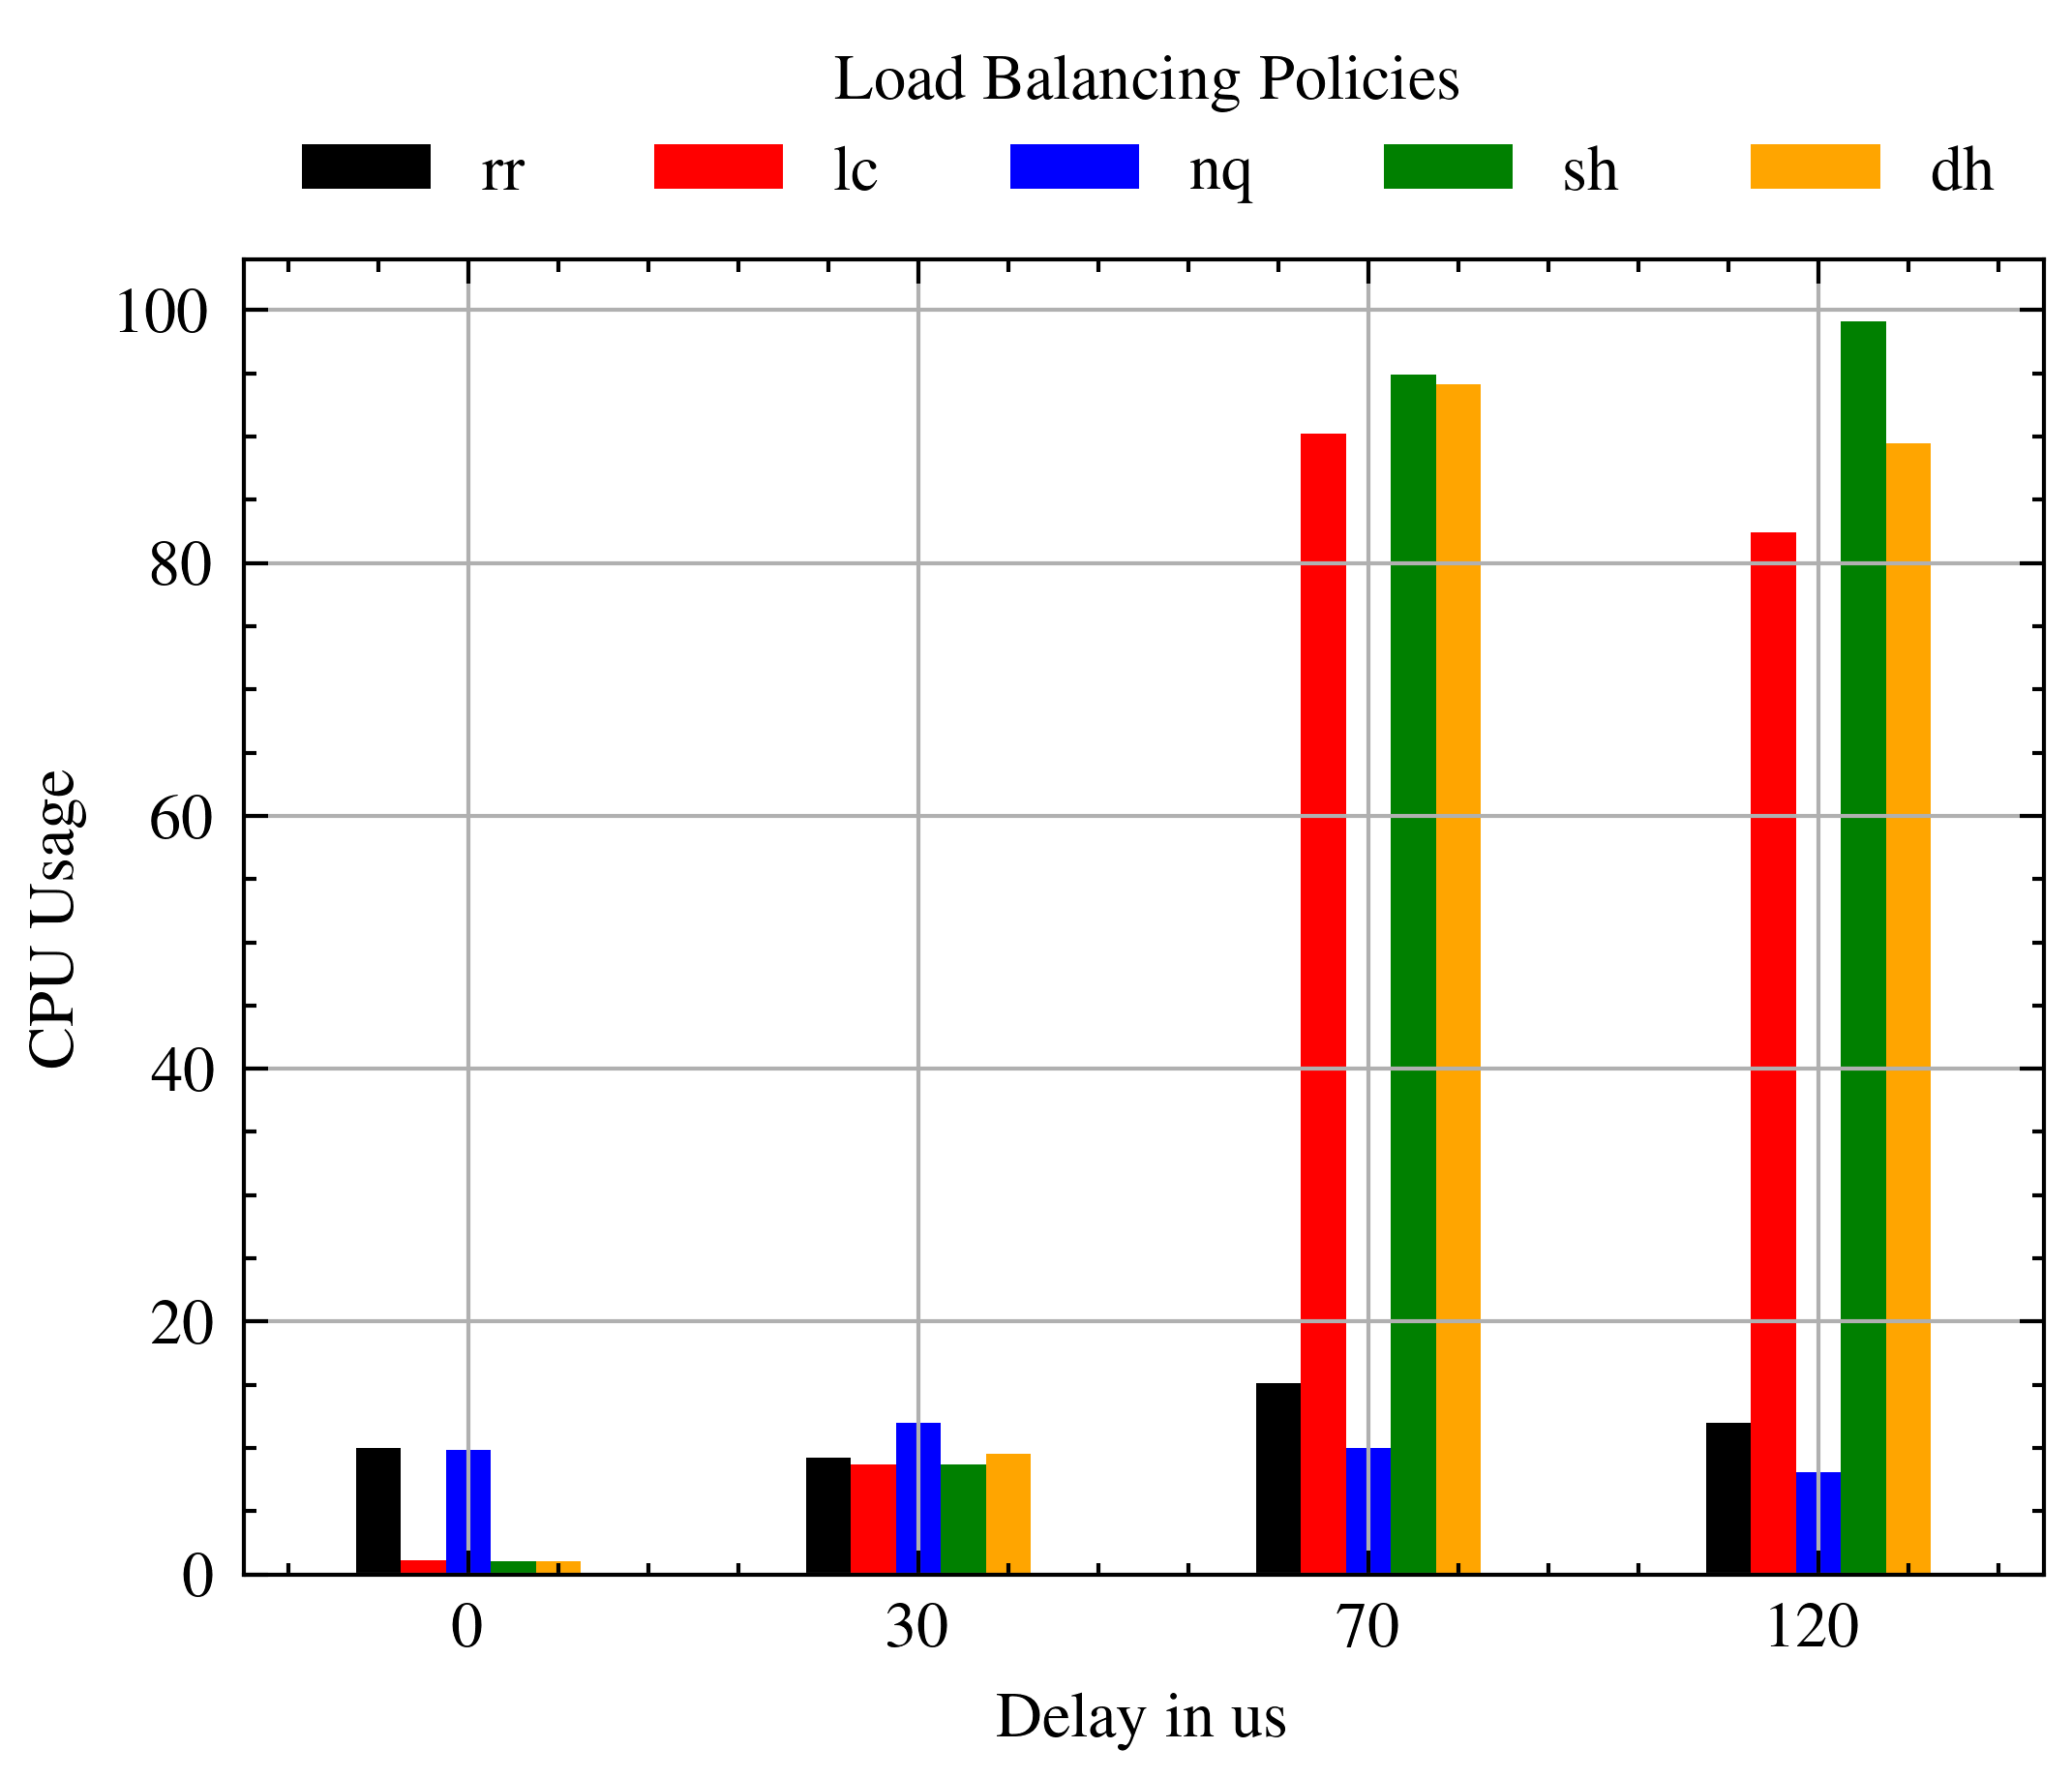

In [120]:
with plt.style.context(['science', 'ieee']):
    df_['throughput'].plot.bar(figsize=(4,3),
        xlabel='Delay in us', y=algo_order,
        ylabel='Throughput in Gbps', 
        grid=True, color=['black', 'red', 'blue', 'green', 'orange']
    )
    plt.xticks(rotation=0)
    plt.legend(ncols=5, bbox_to_anchor=(0, 1.2), loc="upper left", title='Load Balancing Policies')
    plt.savefig("../graphs/ipvs-tp.pdf")
    plt.show()
    
    df_['latency'].plot.bar(figsize=(4,3),
        xlabel='Delay in us', y=algo_order,
        ylabel='P99 Tail Latency in ms', 
        grid=True, color=['black', 'red', 'blue', 'green', 'orange']
    )
    plt.xticks(rotation=0)
    plt.legend(ncols=5, bbox_to_anchor=(0, 1.2), loc="upper left", title='Load Balancing Policies')
    plt.savefig("../graphs/ipvs-latency.pdf")
    plt.show()
    
    df_['cpu'].plot.bar(figsize=(4,3),
        xlabel='Delay in us', y=algo_order,
        ylabel='CPU Usage', 
        grid=True, color=['black', 'red', 'blue', 'green', 'orange']
    )
    plt.xticks(rotation=0)
    plt.legend(ncols=5, bbox_to_anchor=(0, 1.2), loc="upper left", title='Load Balancing Policies')
    plt.savefig("../graphs/ipvs-cpu.pdf")
    plt.show()

# IPVS with delay = 30us

  algo  throughput     latency        cpu  cpu_efficiency variant
0   rr   21.829056  105.056000   9.250000        2.359898    IPVS
1   sh    3.603983   10.054199   8.666667        0.415844    IPVS
2   dh    3.577709   10.057465   9.553333        0.374498    IPVS
3   lc   21.836637  117.980000   8.721111        2.503882    IPVS
4   nq   21.829807  100.914000  12.000000        1.819151    IPVS


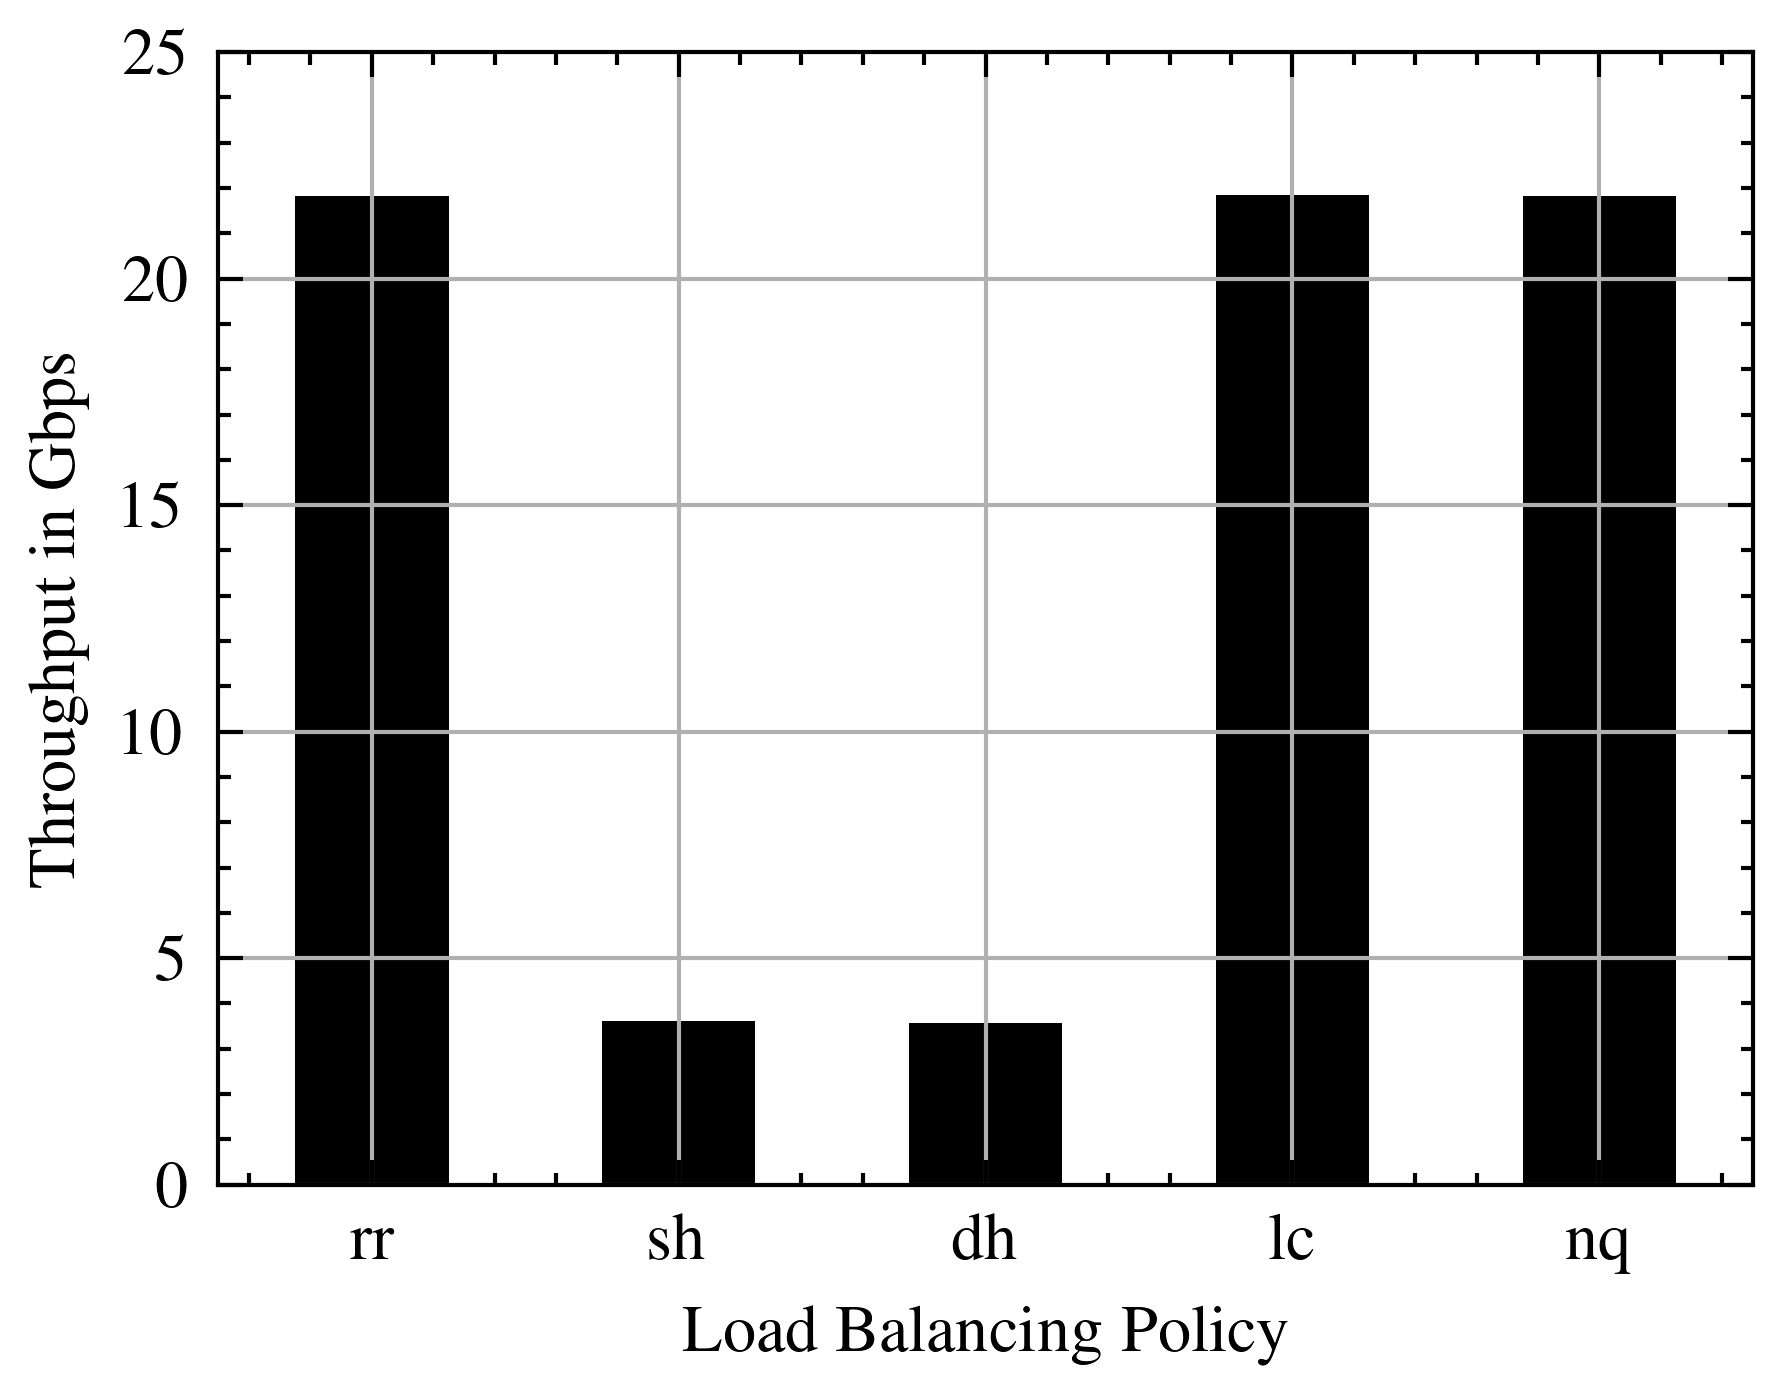

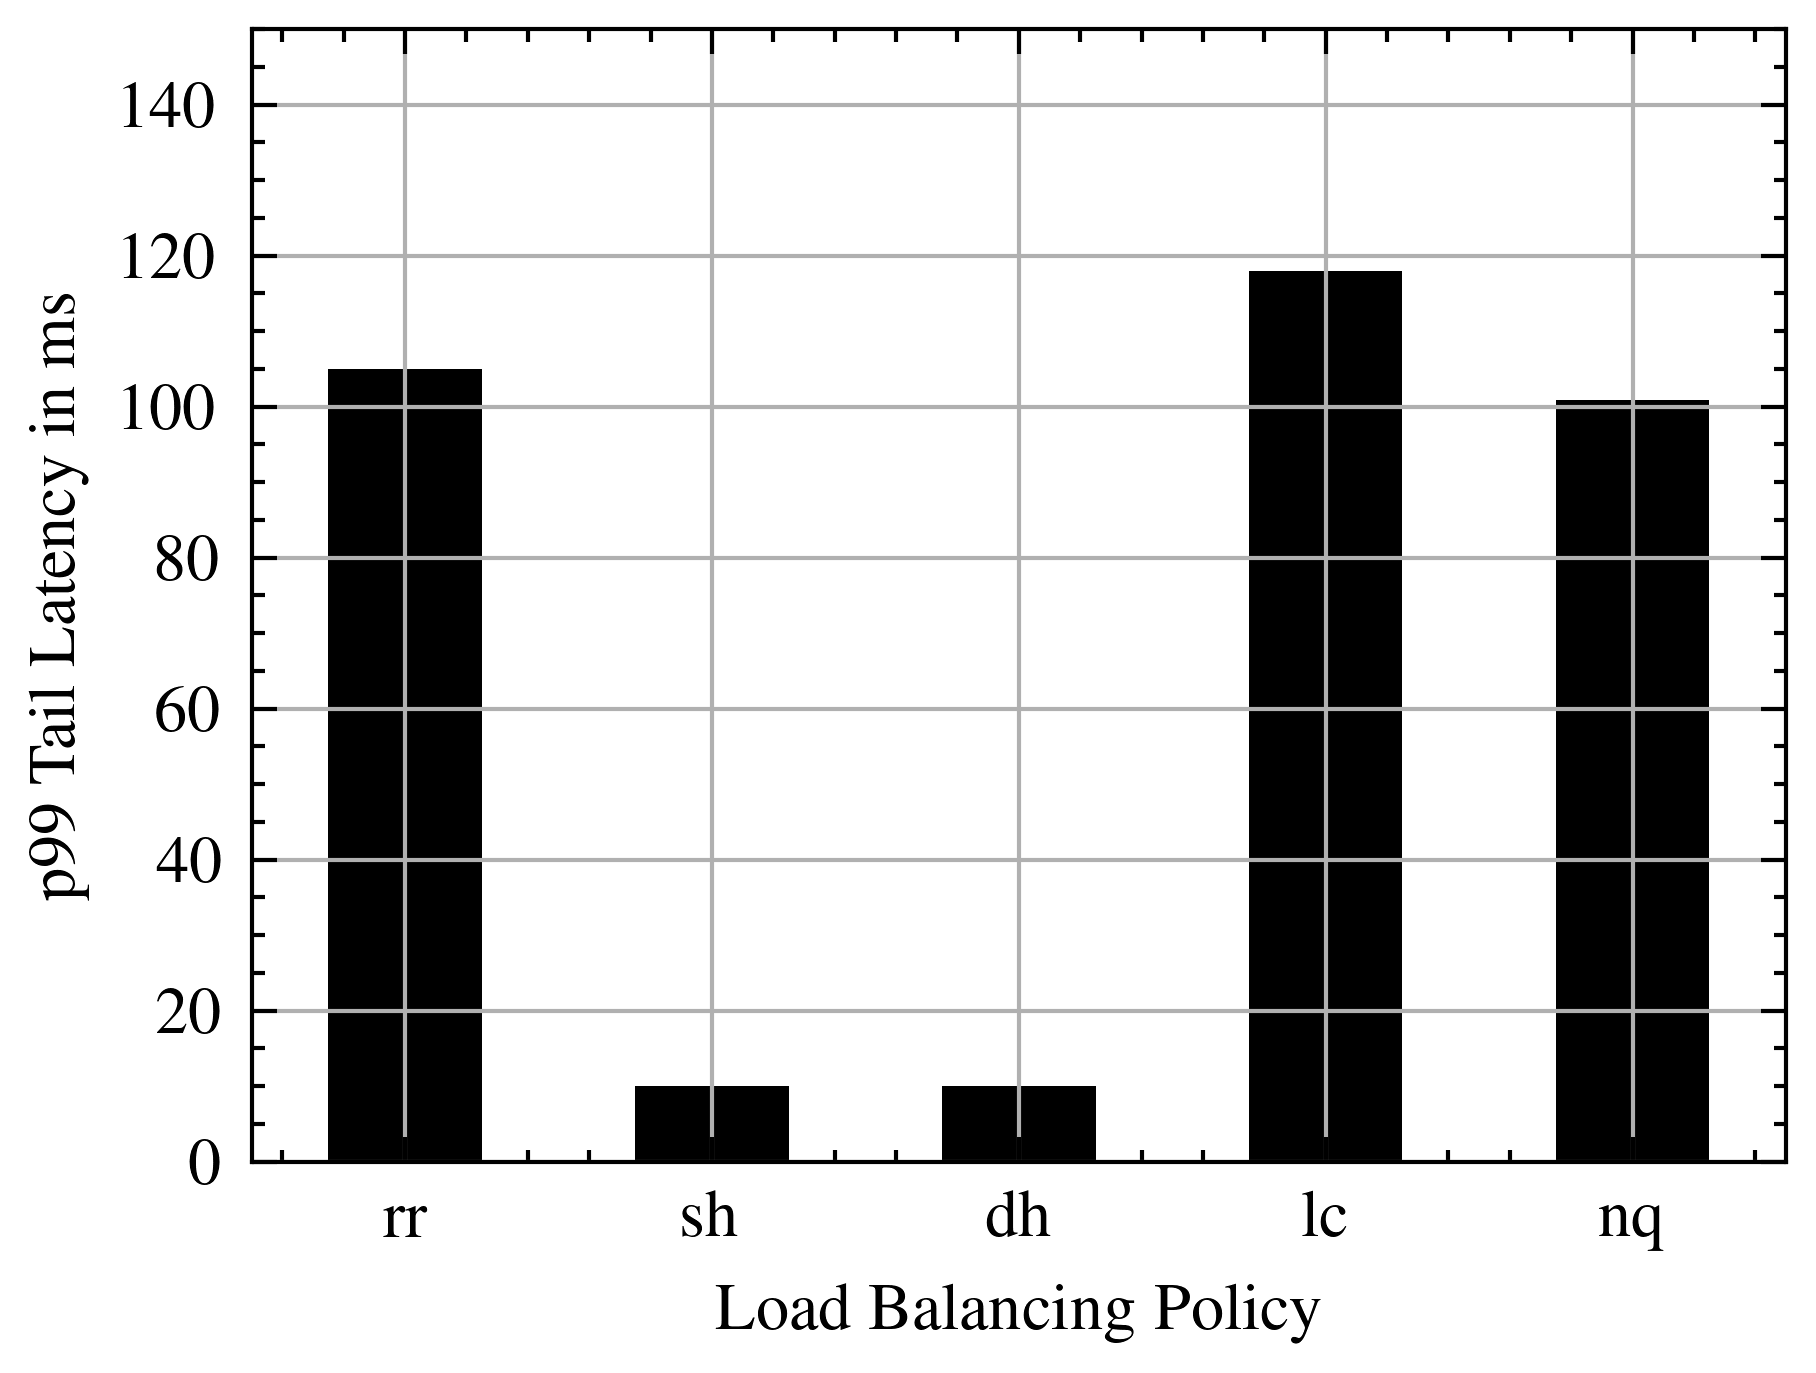

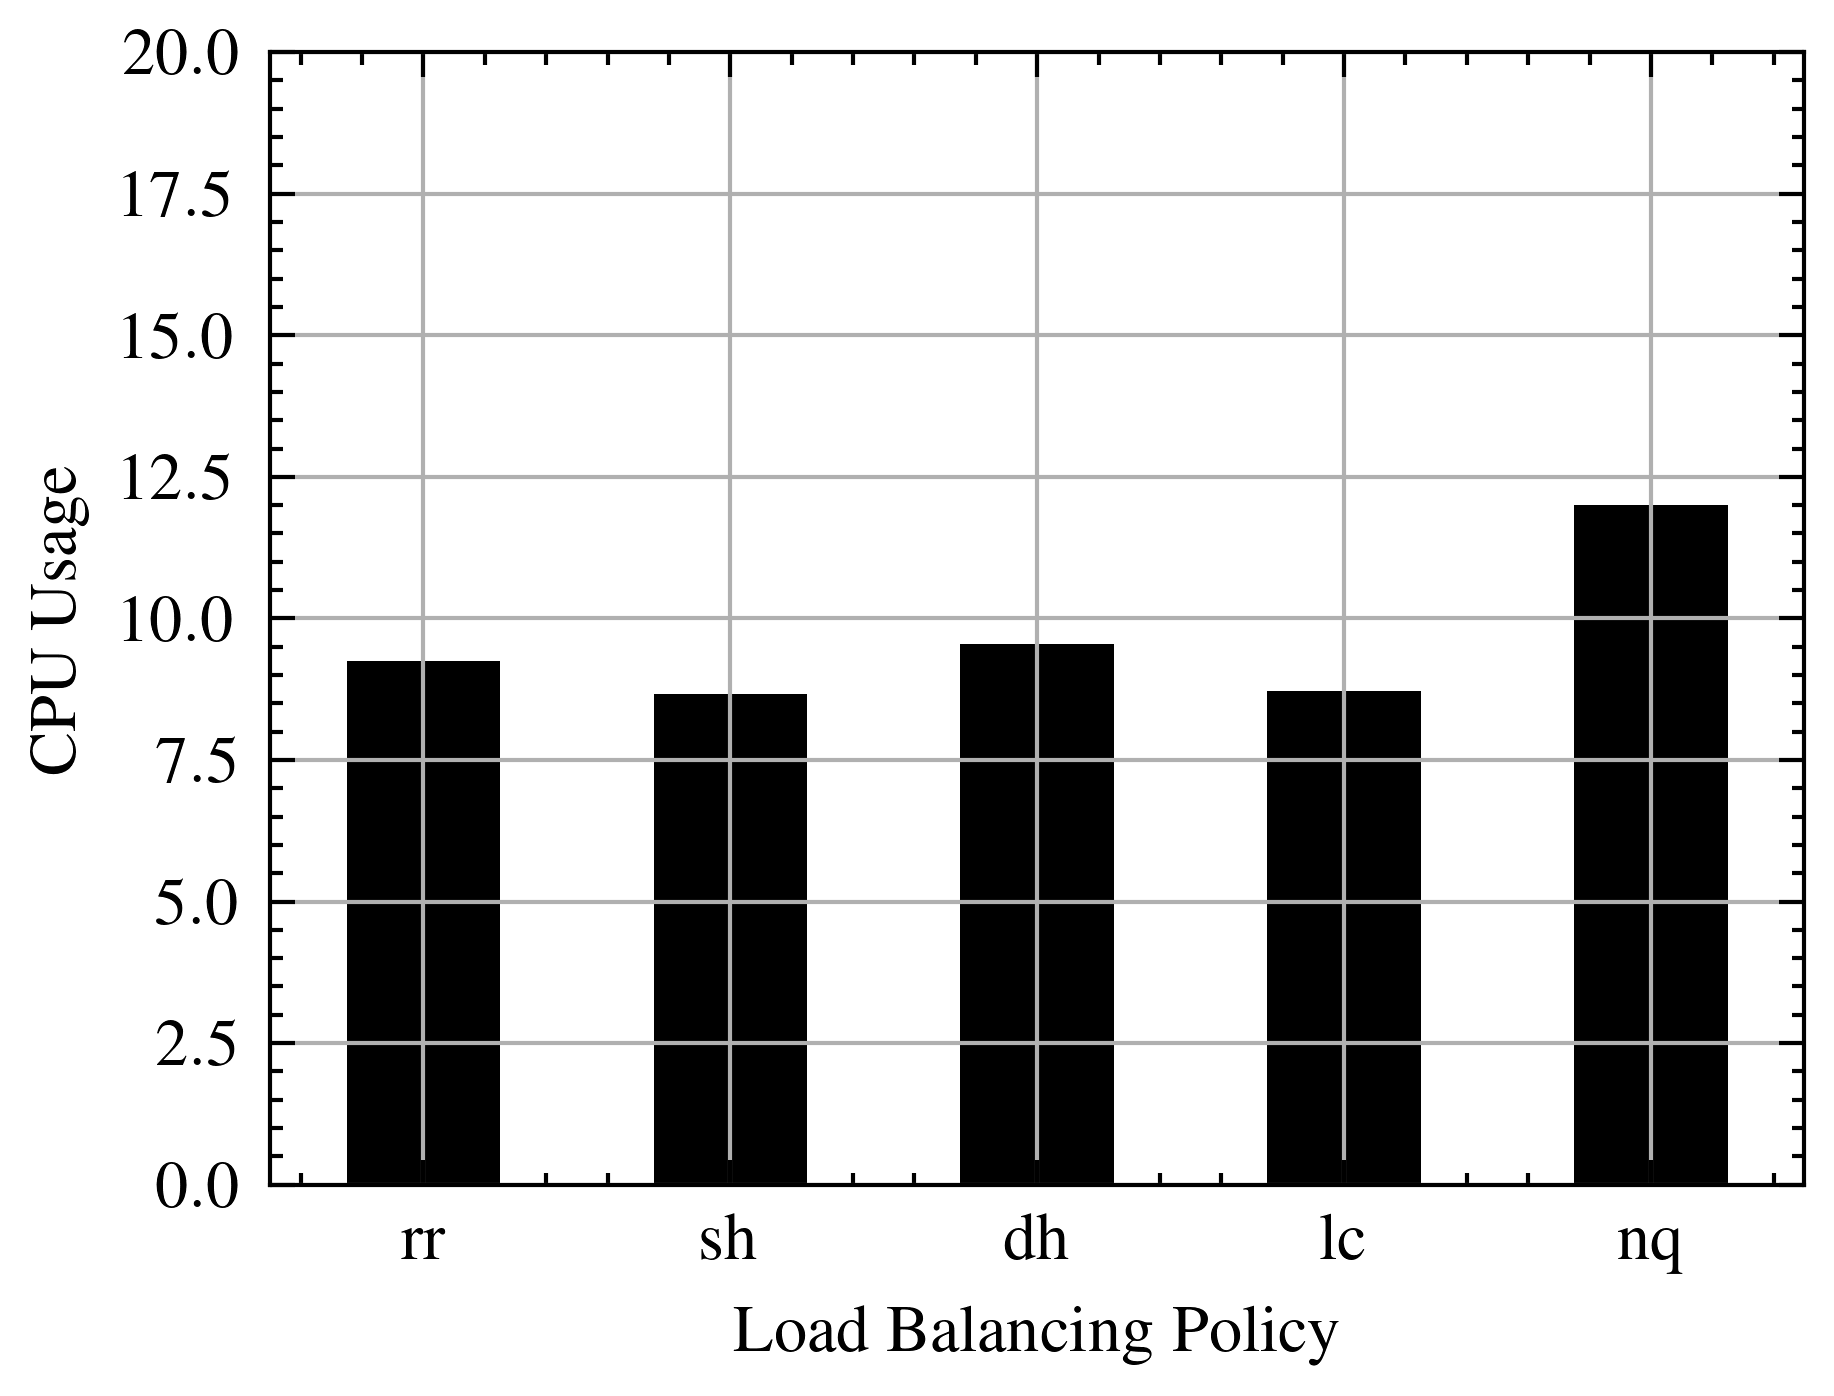

In [60]:
ipvs_path = f"{prefix}/{benchmarks[1]}/summary"
ipvs = import_simple(ipvs_path, additional_names=['algo'])
ipvs['variant'] = 'IPVS'

df = ipvs

print(df)

x = 'algo'
with plt.style.context(['science', 'ieee']):
    df.plot.bar(
        x=x, y='throughput', legend=None, grid=True,
        ylabel="Throughput in Gbps", ylim=[0, 25], xlabel=xlabel,
    )
    plt.xticks(rotation=0)
    plt.savefig('../graphs/ipvs-all-tp.pdf', dpi=300)
    plt.show()

    df.plot.bar(
        x=x, y='latency', legend=None, grid=True,
        ylabel="p99 Tail Latency in ms", ylim=[0, 150], xlabel=xlabel,
    )
    plt.xticks(rotation=0)
    plt.savefig('../graphs/ipvs-p99.pdf', dpi=600)
    plt.show()

    df.plot.bar(
        x=x, y='cpu', legend=None, grid=True,
        ylabel="CPU Usage", ylim=[0, 20], xlabel=xlabel,
    )
    plt.xticks(rotation=0)
    plt.savefig('../graphs/ipvs-cpu.pdf', dpi=300)
    plt.show()

# IPVS with delay = 70 us

  algo  throughput     latency        cpu  cpu_efficiency variant
0   rr   19.661215  398.378000  15.142857        1.298382    IPVS
1   sh    1.792423   20.050810  94.888889        0.018890    IPVS
2   dh    1.751431   19.811837  94.114444        0.018610    IPVS
3   lc   20.554474  403.618000  90.210526        0.227850    IPVS
4   nq   19.600016  404.653000  10.000000        1.960002    IPVS


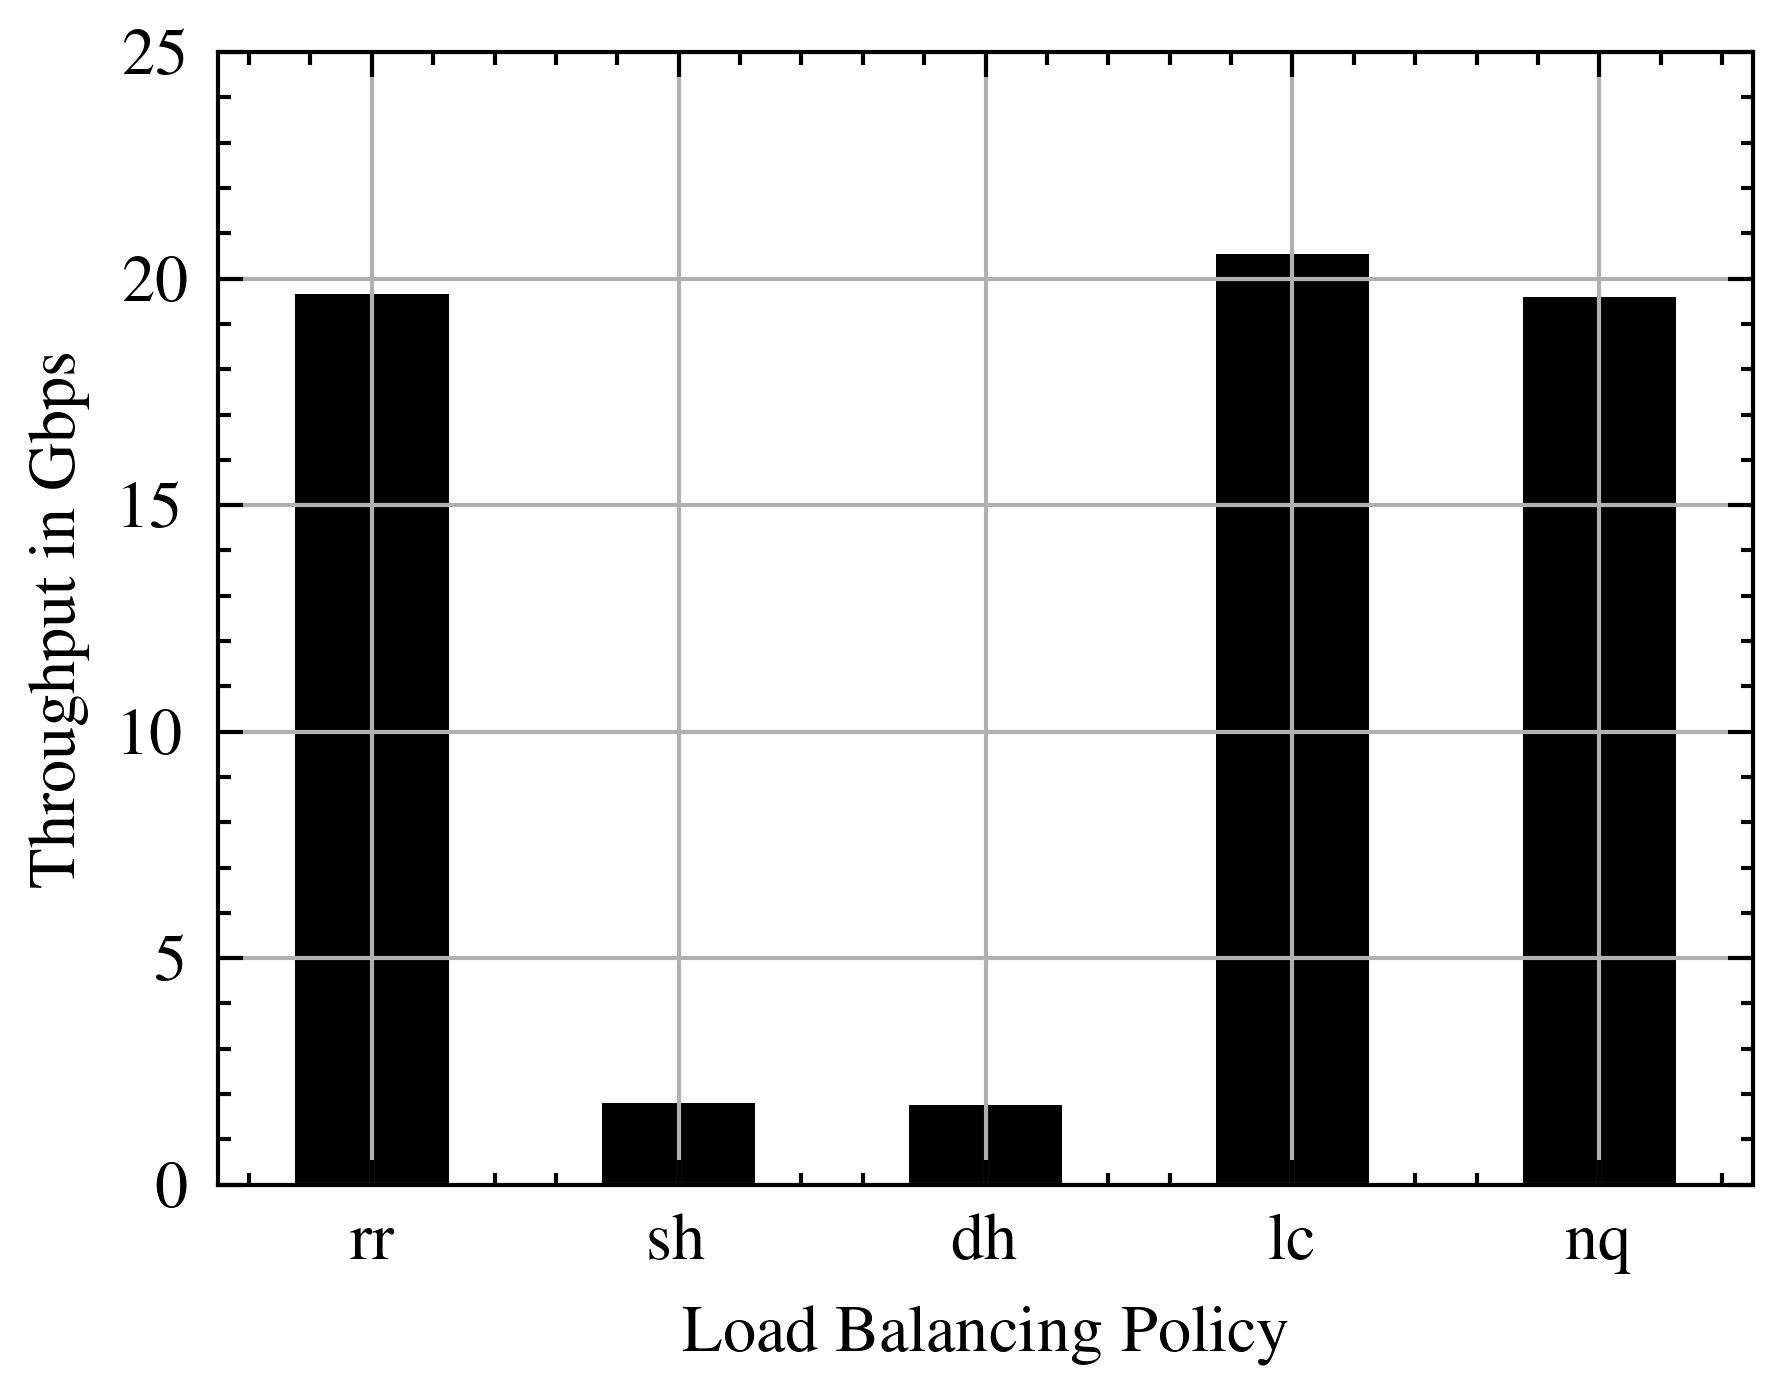

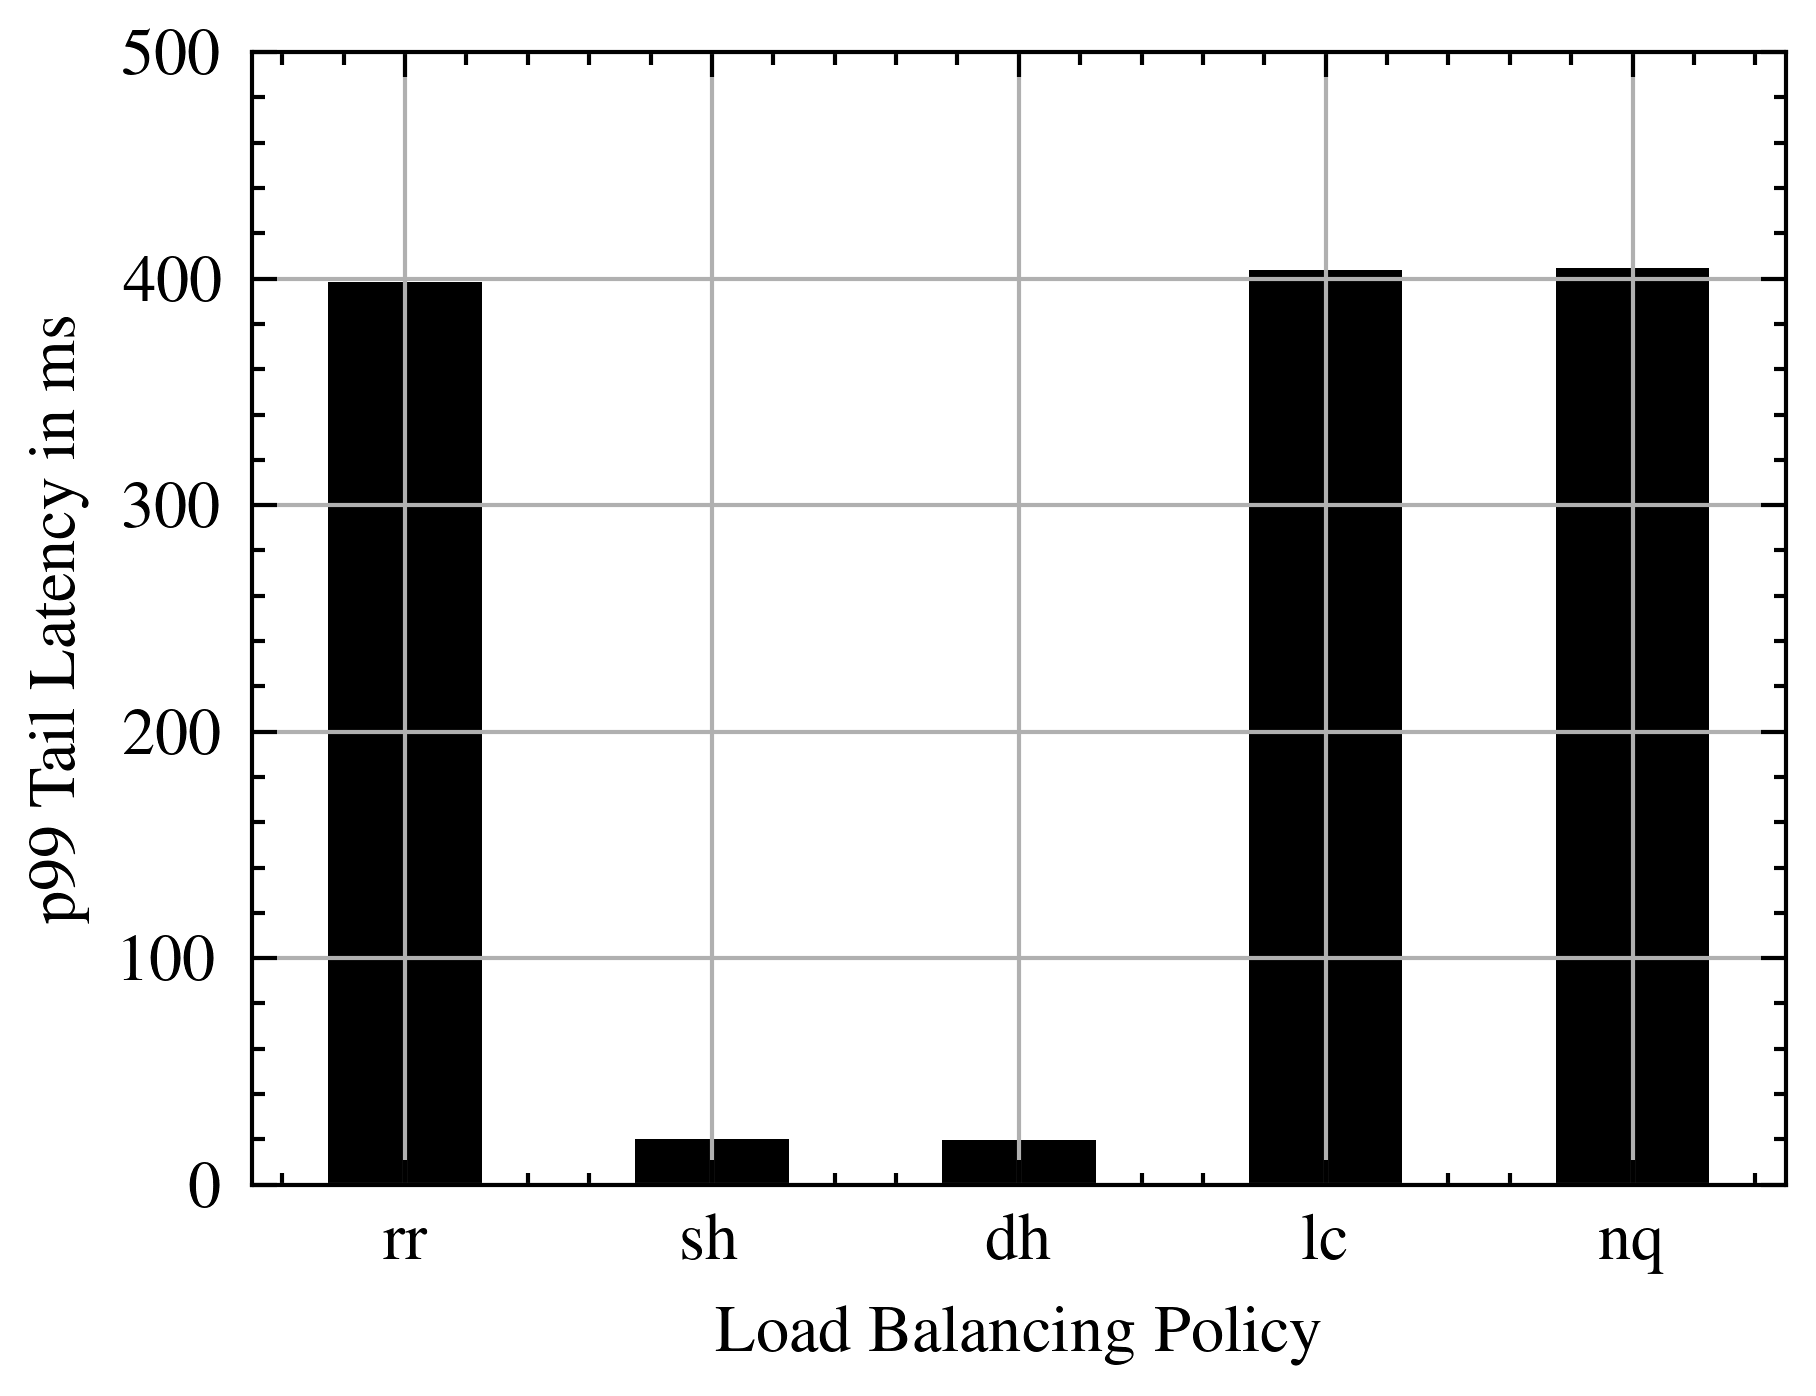

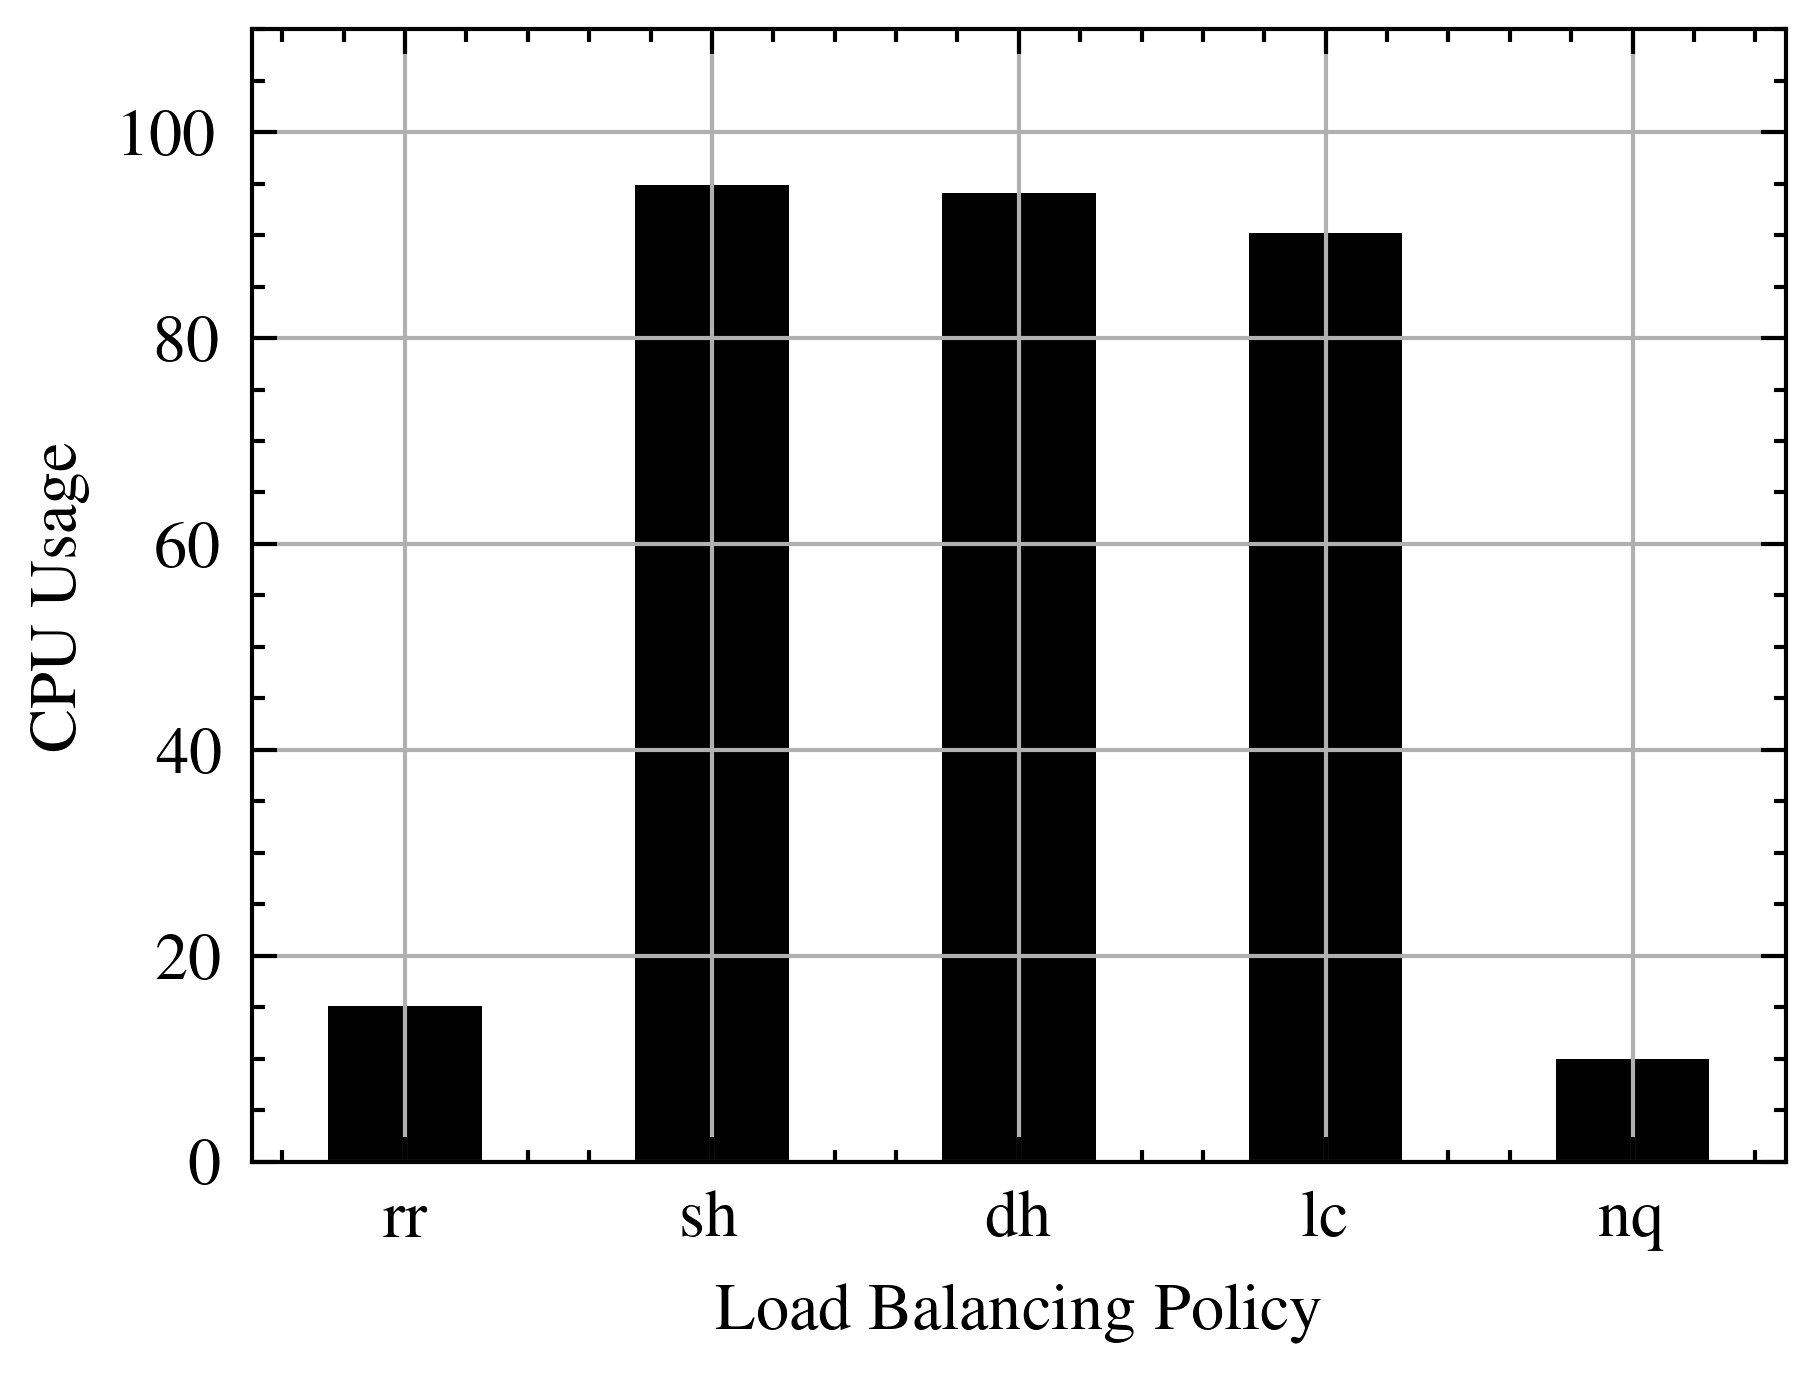

In [63]:
ipvs_path = f"{prefix}/{benchmarks[0]}/summary"
ipvs = import_simple(ipvs_path, additional_names=['algo'])
ipvs['variant'] = 'IPVS'

df = ipvs

print(df)

x = 'algo'
xlabel = 'Load Balancing Policy'
with plt.style.context(['science', 'ieee']):
    df.plot.bar(
        x=x, y='throughput', legend=None, grid=True,
        ylabel="Throughput in Gbps", ylim=[0, 25], xlabel=xlabel,
    )
    plt.xticks(rotation=0)
    plt.savefig('../graphs/ipvs-all-tp.pdf', dpi=300)
    plt.show()

    df.plot.bar(
        x=x, y='latency', legend=None, grid=True,
        ylabel="p99 Tail Latency in ms", ylim=[0, 500], xlabel=xlabel,
    )
    plt.xticks(rotation=0)
    plt.savefig('../graphs/ipvs-p99.pdf', dpi=600)
    plt.show()

    df.plot.bar(
        x=x, y='cpu', legend=None, grid=True,
        ylabel="CPU Usage", ylim=[0, 110], xlabel=xlabel,
    )
    plt.xticks(rotation=0)
    plt.savefig('../graphs/ipvs-cpu.pdf', dpi=300)
    plt.show()

# IPVS with delay = 120 us

  algo  throughput      latency        cpu  cpu_efficiency variant
0   rr   11.066654  1418.370000  12.000000        0.922221    IPVS
1   sh    1.112229    33.921080  99.084444        0.011225    IPVS
2   dh    1.102216    32.571197  89.485789        0.012317    IPVS
3   lc   12.466639  1082.820000  82.444444        0.151213    IPVS
4   nq   11.767574  1294.020000   8.106786        1.451571    IPVS


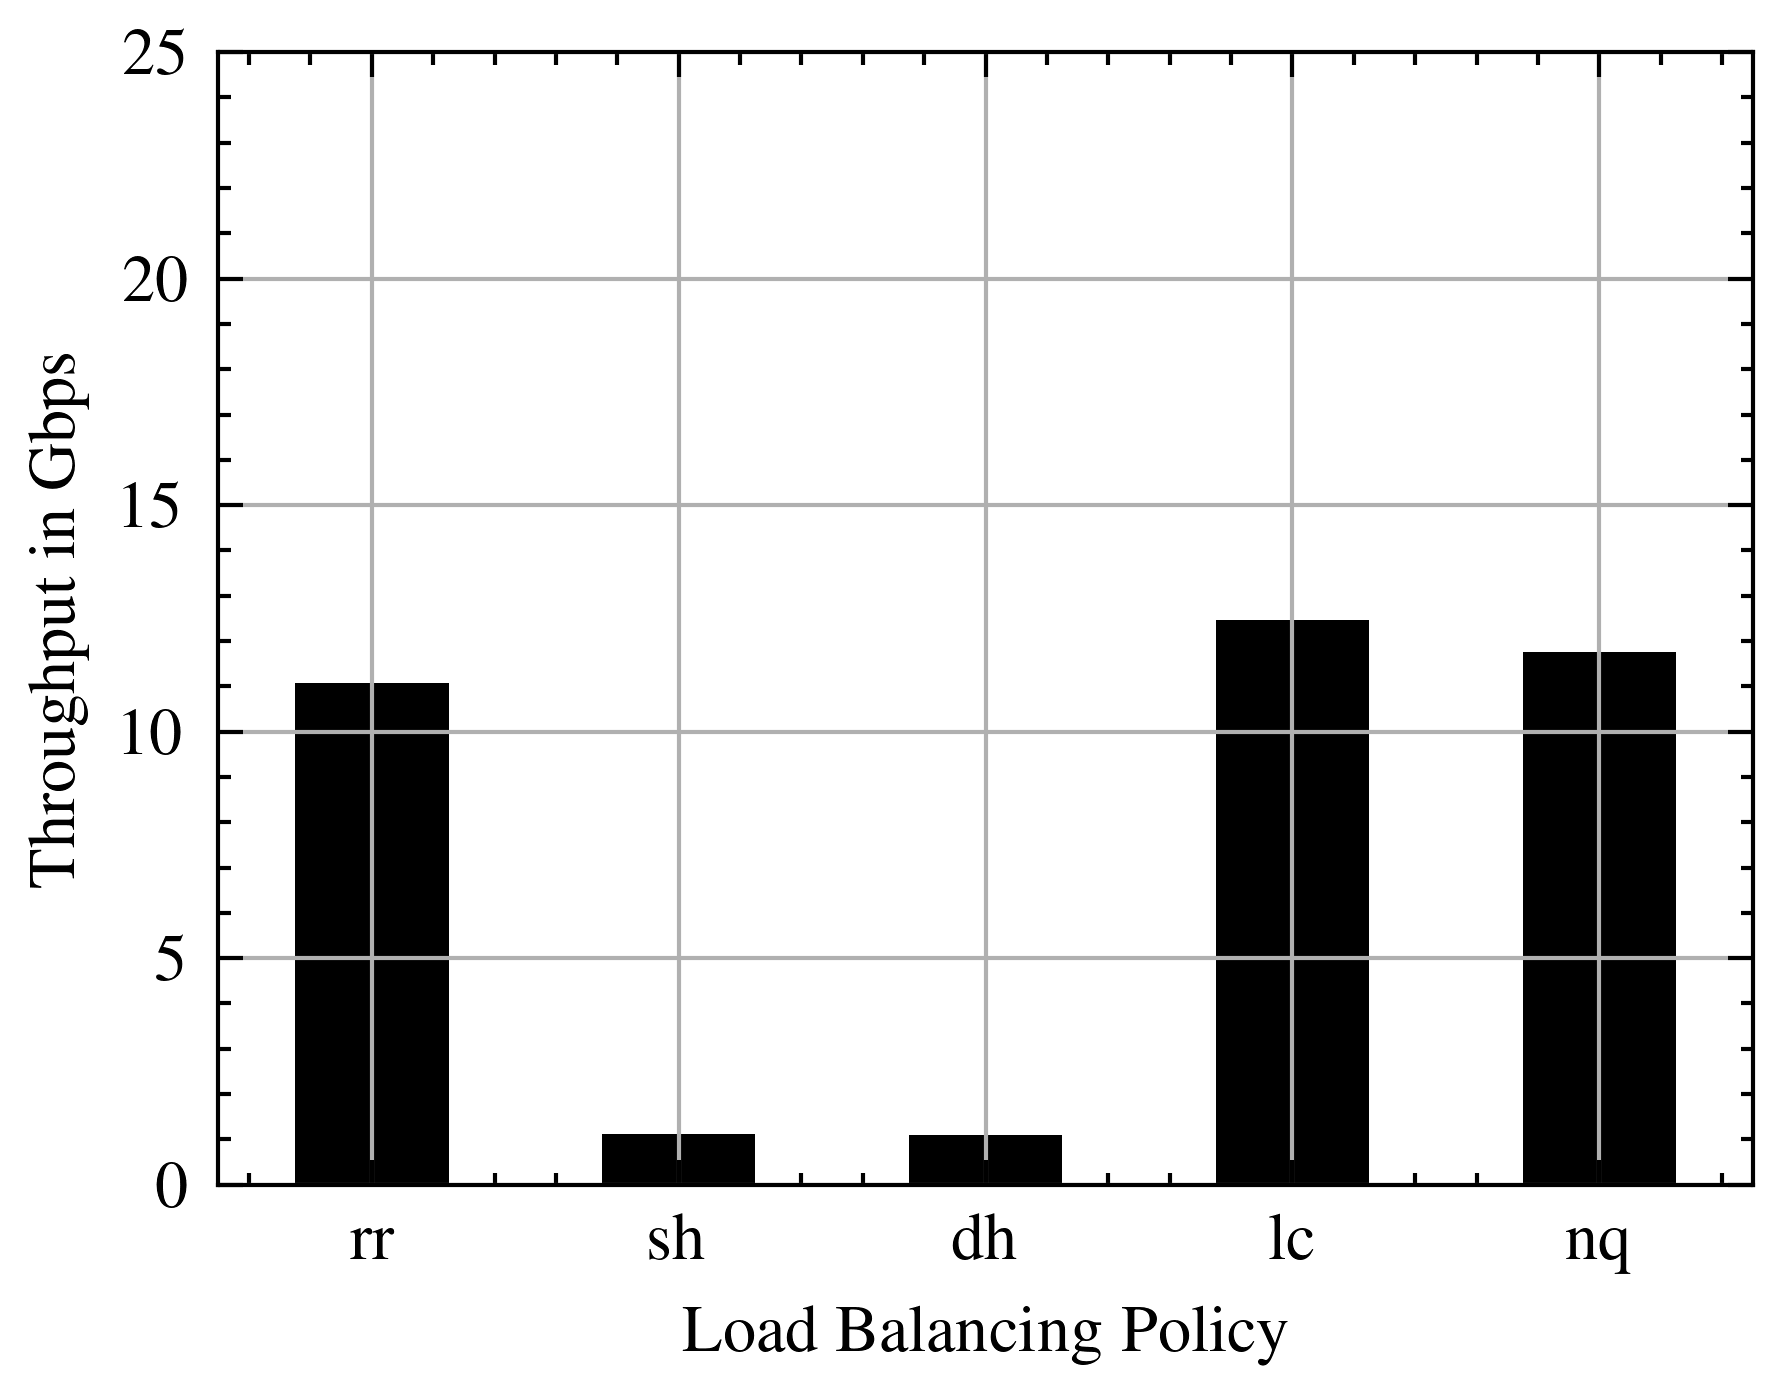

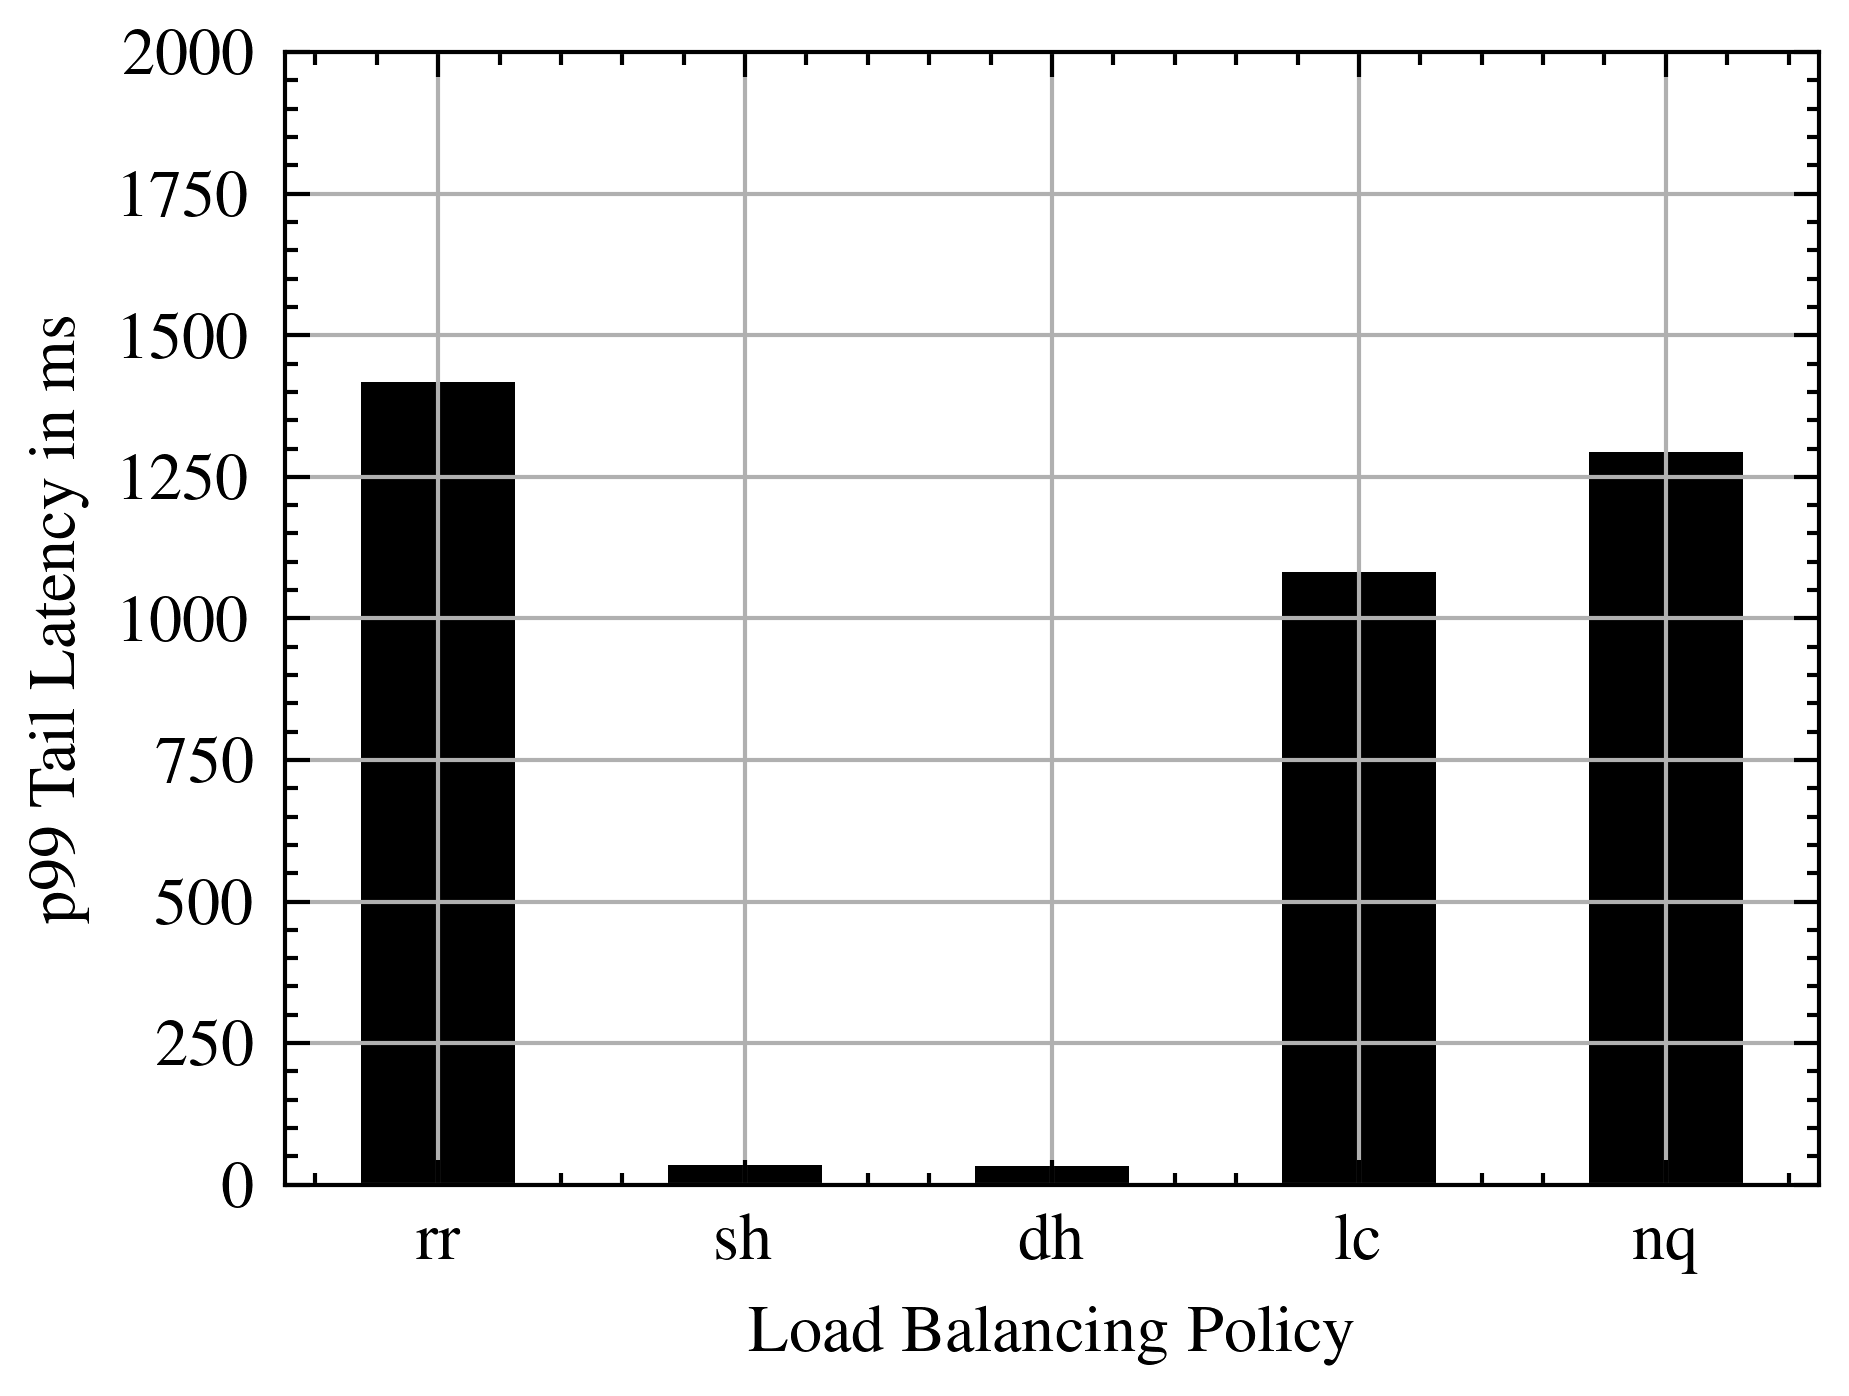

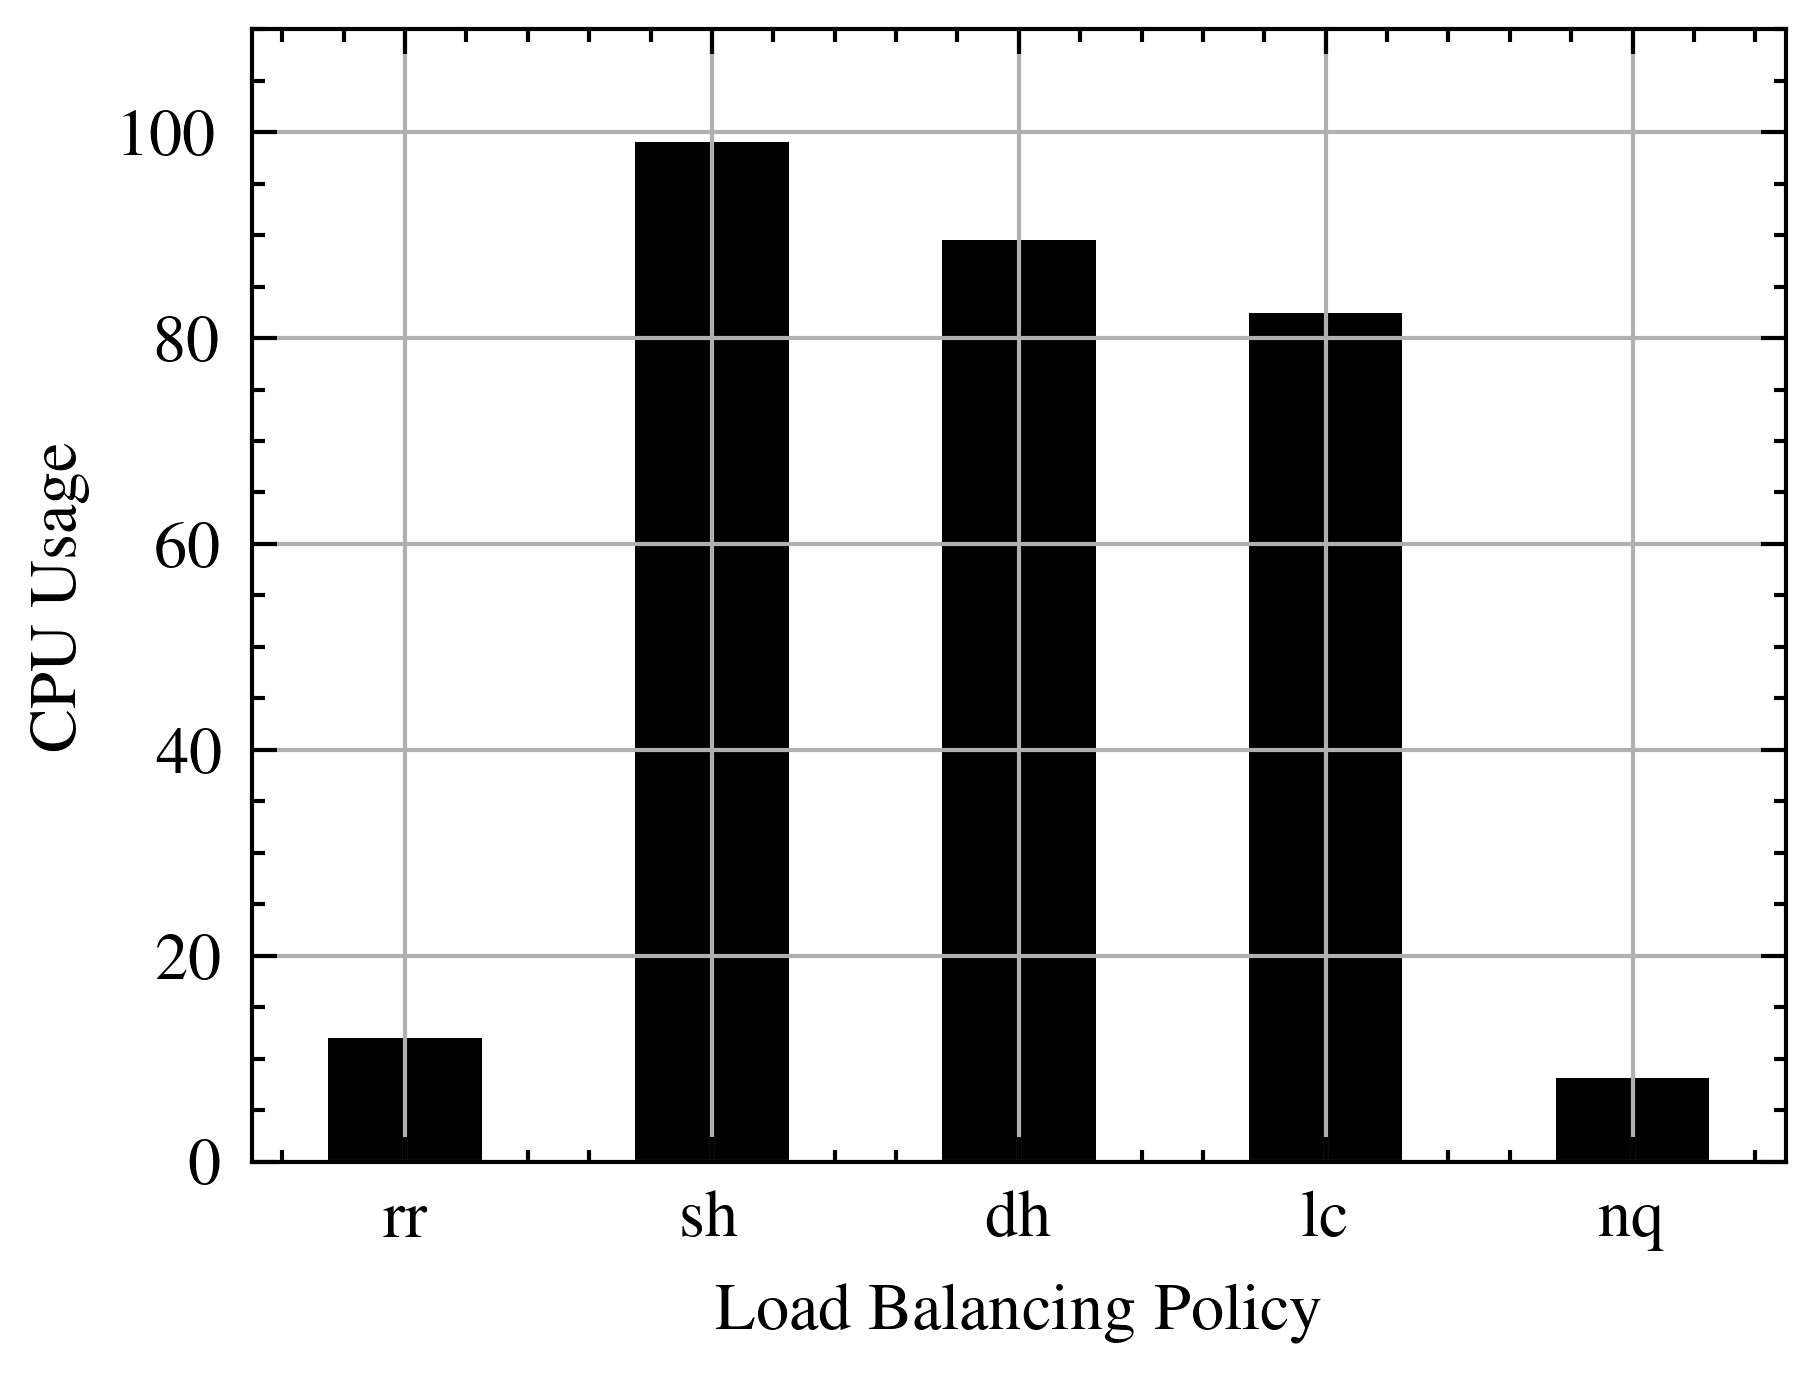

In [65]:
ipvs_path = f"{prefix}/{benchmarks[2]}/summary"
ipvs = import_simple(ipvs_path, additional_names=['algo'])
ipvs['variant'] = 'IPVS'

df = ipvs

print(df)

x = 'algo'
xlabel = 'Load Balancing Policy'
with plt.style.context(['science', 'ieee']):
    df.plot.bar(
        x=x, y='throughput', legend=None, grid=True,
        ylabel="Throughput in Gbps", ylim=[0, 25], xlabel=xlabel,
    )
    plt.xticks(rotation=0)
    plt.savefig('../graphs/ipvs-all-tp.pdf', dpi=300)
    plt.show()

    df.plot.bar(
        x=x, y='latency', legend=None, grid=True,
        ylabel="p99 Tail Latency in ms", ylim=[0, 2000], xlabel=xlabel,
    )
    plt.xticks(rotation=0)
    plt.savefig('../graphs/ipvs-p99.pdf', dpi=600)
    plt.show()

    df.plot.bar(
        x=x, y='cpu', legend=None, grid=True,
        ylabel="CPU Usage", ylim=[0, 110], xlabel=xlabel,
    )
    plt.xticks(rotation=0)
    plt.savefig('../graphs/ipvs-cpu.pdf', dpi=300)
    plt.show()